In [16]:
!pip install EvoOpt

In [29]:
from EvoOpt.solvers.ParticleSwarmOptimization import ParticleSwarmOptimization as PSO #import EvoOpt
from EvoOpt.solvers.GeneticAlgorithm import GeneticAlgorithm as GA
from EvoOpt.solvers.GravitationalSearchAlgorithm import GravitationalSearchAlgorithm as GSA

In [18]:
#this is only required for jupyter notebook to plot nicely
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 15]

### This is a typical reactor optimization problem ###

* Wood is feed into a multi-stage reactor that converts it into bio-char.
* During the reaction, wood is converted into gas, tar and biochar. 
* Normally, only biochar is required. Gas and tar are not as valuable, hence we maximize biochar yield


In [ ]:
import numpy as np
#define reactor function to optimize
def reactor(T,n,ts,tg):
    # Parameters
    TK = T        # reaction temperature, K 773
    taus = ts        # total solids residence time, s
    taug = tg        # total gas residence time, s
    yfw = 1.0       # normalized wood feed

    # Number of stages and residence time in each stage
    nstages = int(n)        # No. of CSTR stages
    tsn = taus/nstages  # Solids residence time in each stage (s)
    tgn = taug/nstages  # Gas residence time in each stage (s)

    # Kinetics parameters
    phi = 0.703     # Max tar yield fraction
    FC = 0.14       # Wt. fraction fixed C
    t1 = 1          # Tar mass formed/mass wood converted in rxn. 1
    g2 = 1          # Gas mass formed/mass tar converted in rxn. 2
    c3 = FC/(1-phi) # Char mass formed/mass wood converted in rxn. 3
    g3 = 1-c3       # Gas mass formed/mass wood converted in rxn. 3
    Rgas = 8.314    # Ideal gas constant (J/mole K)

    k2 = 4.28e6*np.exp(-107.5e3/Rgas/TK)    # Rxn. 2 rate coeff. (1/s)
    k = 1e13*np.exp(-183.3e3/Rgas/TK)       # Sum of rxn. 1 & 3 rate coefficients (1/s)
    k1 = phi*k                              # Rxn 1 rate constant (1/s)
    k3 = (1-phi)*k                          # Rxn. 3 rate constant (1/s)

    # Set up species solution vectors
    yW = yfw*np.ones(nstages)   # Unconverted wood (normalized to feed)
    yT = np.zeros(nstages)      # Tar (noramlized to feed)
    yG = np.zeros(nstages)      # Light gases (normalized to feed)
    yC = np.zeros(nstages)      # Char (normalized to feed)
    yCW = np.zeros(nstages)     # Char + wood (normalized to feed)

    # Mass balance for stage 1
    yW[1] = yfw/(1+k*tsn)                       # Wood in exit
    yT[1] = t1*k1*yW[1]*tsn/(1+k2*tgn)          # Tar in exit
    yG[1] = g2*k2*yT[1]*tgn+g3*k3*yW[1]*tsn     # Gas in exit
    yC[1] = c3*k3*yW[1]*tsn                     # Carbonized char in exit
    yCW[1] = yW[1]+yC[1]      # Total carbonized char + uncoverted wood

    # Mass balances for remaining stages
    for i in range(2, nstages):
        yW[i] = yW[i-1]/(1+k*tsn)                       # Wood in exit of stage i
        yT[i] = (yT[i-1]+t1*k1*yW[i]*tsn)/(1+k2*tgn)    # Tar in exit of stage i
        yG[i] = yG[i-1]+g2*k2*yT[i]*tgn+g3*k3*yW[i]*tsn # Gas in exit
        yC[i] = yC[i-1]+c3*k3*yW[i]*tsn                 # Carbonized char in exit
        yCW[i] = yC[i]+yW[i]                            # Total wood + carbonized char

    # Check overall mass balances for explicit solution
    mout = yW+yT+yG+yC  # Total mass out
    mratio = mout/yfw   # Ratio total mass out/total mass in
    return -(yC[-1])


### Solve using PSO ###

In [20]:
#setup boundaries
x=['T','n','ts','tg']
lb=[273, 2, 0.5, 0.5]
ub=[1073, 20, 100, 100]

In [27]:
#setup solver
pso=PSO(reactor,x,lb,ub,pop=5,max_gen=10000)

In [31]:
pso.solve()

Generation # 0 Best Fitness= -0.13999999999999999 Answer= [1.07300000e+03 1.60430675e+01 1.00000000e+02 5.00000000e-01]
Generation # 1 Best Fitness= -0.13999999999999999 Answer= [1073.           16.21134801  100.           56.3347697 ]
Generation # 2 Best Fitness= -0.14 Answer= [981.7522014    9.27013009  70.36817367  73.74600151]
Generation # 3 Best Fitness= -0.1399779031745868 Answer= [905.41188139   2.74362865  47.64394792  55.23919034]
Generation # 4 Best Fitness= -0.14 Answer= [924.67796786   8.55471242  96.48288243  21.83495296]
Generation # 5 Best Fitness= -0.14 Answer= [1037.65309025   14.20450056  100.           22.30885637]
Generation # 6 Best Fitness= -0.13999999999999999 Answer= [1073.           10.24789171   83.57271068  100.        ]
Generation # 7 Best Fitness= -0.14000000000000004 Answer= [1039.85654851    5.07983275   55.42967118  100.        ]
Generation # 8 Best Fitness= -0.13999719155752016 Answer= [1010.02744218    2.           30.10093562  100.        ]
Generation

Generation # 107 Best Fitness= -0.13999954117053068 Answer= [1040.63790807    2.91746117   96.95036288  100.        ]
Generation # 108 Best Fitness= -0.14000000000000004 Answer= [1045.66238637   12.35904306   59.75111346  100.        ]
Generation # 109 Best Fitness= -0.14 Answer= [1066.61690162   16.0030721    25.67146892   83.65606785]
Generation # 110 Best Fitness= -0.1399996167258671 Answer= [1065.63986347    2.           70.60205164  100.        ]
Generation # 111 Best Fitness= -0.13999962460264964 Answer= [1058.45658064    2.           82.94955868  100.        ]
Generation # 112 Best Fitness= -0.13999922314168814 Answer= [1043.51729153    2.11379733   54.00941131   73.2612886 ]
Generation # 113 Best Fitness= -0.13999999999999999 Answer= [1047.69605001   15.88611641   34.22514519   47.73804487]
Generation # 114 Best Fitness= -0.14000000000000004 Answer= [1073.           17.01650349   59.05311554   76.60180264]
Generation # 115 Best Fitness= -0.13999999999999993 Answer= [1034.801813

Generation # 184 Best Fitness= -0.13999999999999996 Answer= [1068.97268983   14.19794517  100.           55.0345025 ]
Generation # 185 Best Fitness= -0.14 Answer= [1019.0705531     6.15086898  100.           47.10761674]
Generation # 186 Best Fitness= -0.13999999999999996 Answer= [1049.65206352    4.62332178   95.92728127  100.        ]
Generation # 187 Best Fitness= -0.14000000000000004 Answer= [1073.            6.61123485   39.01326     100.        ]
Generation # 188 Best Fitness= -0.14 Answer= [1068.15091323   11.12156343   43.66765479   92.09617591]
Generation # 189 Best Fitness= -0.14 Answer= [1019.51540897   13.70684786   85.10056279   72.35381293]
Generation # 190 Best Fitness= -0.14000000000000004 Answer= [999.37213429   5.78544456  94.25020987  69.74515322]
Generation # 191 Best Fitness= -0.13999955378983 Answer= [1047.03468551    2.78380043   87.58873412  100.        ]
Generation # 192 Best Fitness= -0.14 Answer= [1073.            9.88256558   64.90901569  100.        ]
Gener

Generation # 269 Best Fitness= -0.14 Answer= [1073.            5.90069907   82.91746243   90.25012334]
Generation # 270 Best Fitness= -0.14000000000000007 Answer= [1073.            5.53753177   83.62260678   90.22660116]
Generation # 271 Best Fitness= -0.13999999999999999 Answer= [1073.            4.32233064   84.96508133   90.23124706]
Generation # 272 Best Fitness= -0.13999999999999999 Answer= [1073.            4.79196023   86.12300259   90.27241245]
Generation # 273 Best Fitness= -0.13999999999999999 Answer= [1073.            5.65547199   83.23824091   90.28662621]
Generation # 274 Best Fitness= -0.13999999999999999 Answer= [1073.            5.95605759   81.59359034   90.2551208 ]
Generation # 275 Best Fitness= -0.13999999999999999 Answer= [1073.            4.45788465   81.74426016   90.22652931]
Generation # 276 Best Fitness= -0.14 Answer= [1073.            4.83179596   85.70662489   90.24649831]
Generation # 277 Best Fitness= -0.14 Answer= [1073.            5.90354873   85.7071588

Generation # 357 Best Fitness= -0.14 Answer= [1073.            6.51239009   96.16207195   90.28367372]
Generation # 358 Best Fitness= -0.14 Answer= [1073.            6.28683509   87.65852078   90.22436902]
Generation # 359 Best Fitness= -0.14000000000000004 Answer= [1073.            5.78505388   76.9024521    90.21938684]
Generation # 360 Best Fitness= -0.13999999999858345 Answer= [1073.            3.7001084    79.08722733   90.24915973]
Generation # 361 Best Fitness= -0.14 Answer= [1073.            4.56070696   88.44336317   90.27980652]
Generation # 362 Best Fitness= -0.14000000000000004 Answer= [1073.            5.96286396   89.39127448   90.2961048 ]
Generation # 363 Best Fitness= -0.13999999999999999 Answer= [1073.            6.18834456   82.1943321    90.23272662]
Generation # 364 Best Fitness= -0.14 Answer= [1073.            5.04478701   79.45584603   90.19892972]
Generation # 365 Best Fitness= -0.14 Answer= [1073.            4.29553724   86.00436643   90.22511035]
Generation # 

Generation # 432 Best Fitness= -0.14000000000000004 Answer= [1073.            6.87740823   84.42501707   90.19075361]
Generation # 433 Best Fitness= -0.14 Answer= [1073.            4.88573756   83.75212311   90.27792539]
Generation # 434 Best Fitness= -0.13999999999872204 Answer= [1073.            3.48296879   83.26435964   90.31740597]
Generation # 435 Best Fitness= -0.14 Answer= [1073.            6.25549199   83.69994257   90.28842226]
Generation # 436 Best Fitness= -0.14 Answer= [1073.            6.9556708    84.74280223   90.18127366]
Generation # 437 Best Fitness= -0.13999999999878282 Answer= [1073.            3.05488278   85.31819629   90.13077622]
Generation # 438 Best Fitness= -0.13999972236737246 Answer= [1073.            2.           84.57145024   90.27941995]
Generation # 439 Best Fitness= -0.13999999999999999 Answer= [1073.            4.92441418   83.37160734   90.39941301]
Generation # 440 Best Fitness= -0.14 Answer= [1073.            7.93850536   82.88281421   90.24469059

Generation # 514 Best Fitness= -0.13999999999999999 Answer= [1073.            5.19632424   90.64949108   90.174811  ]
Generation # 515 Best Fitness= -0.13999999999863608 Answer= [1073.            3.72699557   80.59787384   90.22917392]
Generation # 516 Best Fitness= -0.13999999999860452 Answer= [1073.            3.92007033   79.68121838   90.31817443]
Generation # 517 Best Fitness= -0.13999999999999999 Answer= [1073.            5.7193815    88.32408928   90.27754703]
Generation # 518 Best Fitness= -0.14 Answer= [1073.            6.60433309   86.08292264   90.18893112]
Generation # 519 Best Fitness= -0.13999999999862306 Answer= [1073.            3.96107178   80.21588214   90.24294927]
Generation # 520 Best Fitness= -0.13999969164179954 Answer= [1073.            2.4623322    76.14452527   90.31111911]
Generation # 521 Best Fitness= -0.13999999999879809 Answer= [1073.            3.53504168   85.85897504   90.28208   ]
Generation # 522 Best Fitness= -0.14 Answer= [1073.            8.087676

Generation # 647 Best Fitness= -0.14 Answer= [1073.            4.34819064   84.4042088    90.66300329]
Generation # 648 Best Fitness= -0.14000000000000004 Answer= [1073.            5.07003041   83.81886058   90.88953882]
Generation # 649 Best Fitness= -0.14000000000000004 Answer= [1073.            5.79490563   83.78021481   90.95163642]
Generation # 650 Best Fitness= -0.14 Answer= [1073.            5.92840064   83.88478657   90.29936931]
Generation # 651 Best Fitness= -0.14000000000000004 Answer= [1073.            5.61912885   84.32692163   89.6672912 ]
Generation # 652 Best Fitness= -0.14 Answer= [1073.            5.11146197   84.09598177   89.22677756]
Generation # 653 Best Fitness= -0.14 Answer= [1073.            4.69828941   83.8196876    89.95997864]
Generation # 654 Best Fitness= -0.14 Answer= [1073.            5.5202988    83.909941     91.04583276]
Generation # 655 Best Fitness= -0.14000000000000004 Answer= [1073.            5.33653699   84.21092435   91.39191009]
Generation # 

Generation # 791 Best Fitness= -0.14 Answer= [1073.            5.15229596   84.02826141   90.26825784]
Generation # 792 Best Fitness= -0.14 Answer= [1073.            5.15335507   84.02486109   90.25455364]
Generation # 793 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15514973   84.06862127   90.24219237]
Generation # 794 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15563902   84.0960681    90.25223626]
Generation # 795 Best Fitness= -0.14 Answer= [1073.            5.15393934   84.07195292   90.2670581 ]
Generation # 796 Best Fitness= -0.14 Answer= [1073.            5.15200646   84.04397618   90.25607776]
Generation # 797 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15136677   84.03000875   90.24401593]
Generation # 798 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15154627   84.04920394   90.23758046]
Generation # 799 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15435006   84.06683898   90.26130682

Generation # 954 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15941812   83.94839384   90.27801789]
Generation # 955 Best Fitness= -0.13999999999999999 Answer= [1073.            5.15954867   84.09049792   90.27852167]
Generation # 956 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15738541   84.18576725   90.25425565]
Generation # 957 Best Fitness= -0.14 Answer= [1073.            5.14922969   83.91448847   90.23285215]
Generation # 958 Best Fitness= -0.14 Answer= [1073.            5.14681935   83.88855469   90.23000274]
Generation # 959 Best Fitness= -0.14 Answer= [1073.            5.15953842   84.09051246   90.28691773]
Generation # 960 Best Fitness= -0.14 Answer= [1073.            5.15725503   84.25416788   90.31641192]
Generation # 961 Best Fitness= -0.14000000000000004 Answer= [1073.            5.14689134   83.89374097   90.18238818]
Generation # 962 Best Fitness= -0.14 Answer= [1073.            5.15508443   83.89123247   90.21627809]
Generation # 

Generation # 1092 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15127179   82.71403952   91.02206153]
Generation # 1093 Best Fitness= -0.13999999999999999 Answer= [1073.            5.1450158    94.3502929    90.43016576]
Generation # 1094 Best Fitness= -0.13999999999999999 Answer= [1073.            5.1483014    93.6514769    89.80288139]
Generation # 1095 Best Fitness= -0.14 Answer= [1073.            5.15760329   69.74770268   90.42611373]
Generation # 1096 Best Fitness= -0.13999999999999999 Answer= [1073.            5.15904092   79.47021078   90.71340307]
Generation # 1097 Best Fitness= -0.14 Answer= [1073.            5.15391025   96.44891249   90.15192732]
Generation # 1098 Best Fitness= -0.14 Answer= [1073.            5.14869791  100.           89.75590914]
Generation # 1099 Best Fitness= -0.14000000000000004 Answer= [1073.            5.14776759   79.05603536   89.85829781]
Generation # 1100 Best Fitness= -0.13999999999999999 Answer= [1073.            5.16129808   6

Generation # 1242 Best Fitness= -0.13999999999999999 Answer= [1073.            5.15423319   92.31444209   90.26190093]
Generation # 1243 Best Fitness= -0.14 Answer= [1073.            5.15384832  100.           90.28936374]
Generation # 1244 Best Fitness= -0.14 Answer= [1073.            5.15322041   89.39253399   90.22502644]
Generation # 1245 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15307532   74.60089721   90.2519981 ]
Generation # 1246 Best Fitness= -0.13999999999999999 Answer= [1073.            5.15365488   69.25689707   90.28196988]
Generation # 1247 Best Fitness= -0.13999999999999999 Answer= [1073.            5.15421988   97.11626856   90.29231043]
Generation # 1248 Best Fitness= -0.14 Answer= [1073.            5.15357454  100.           90.23513761]
Generation # 1249 Best Fitness= -0.13999999999999999 Answer= [1073.            5.15302299   68.71945189   90.20417341]
Generation # 1250 Best Fitness= -0.14 Answer= [1073.            5.153364     65.62482041   90

Generation # 1377 Best Fitness= -0.14 Answer= [1073.            5.15364591   75.26164045   90.29373973]
Generation # 1378 Best Fitness= -0.14 Answer= [1073.            5.15369508   78.7193498    90.43816904]
Generation # 1379 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15370255   86.06716832   90.4473334 ]
Generation # 1380 Best Fitness= -0.14 Answer= [1073.            5.15366807   88.68737559   90.08958075]
Generation # 1381 Best Fitness= -0.13999999999999999 Answer= [1073.            5.1536478    82.47305453   90.02016963]
Generation # 1382 Best Fitness= -0.14 Answer= [1073.            5.15368188   77.85227035   90.07015271]
Generation # 1383 Best Fitness= -0.14 Answer= [1073.            5.15370991   81.15257385   90.1556139 ]
Generation # 1384 Best Fitness= -0.14 Answer= [1073.            5.15369338   91.36670779   90.2533019 ]
Generation # 1385 Best Fitness= -0.14 Answer= [1073.            5.15367614   85.65685487   90.34300724]
Generation # 1386 Best Fitness= -0

Generation # 1521 Best Fitness= -0.14 Answer= [1073.            5.15367896   87.34603559   90.23923407]
Generation # 1522 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15366554   71.96610104   90.25934506]
Generation # 1523 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15369587   71.43259643   90.26764919]
Generation # 1524 Best Fitness= -0.13999999999999999 Answer= [1073.            5.15370292   93.51722287   90.25857976]
Generation # 1525 Best Fitness= -0.14 Answer= [1073.            5.15367471  100.           90.24345951]
Generation # 1526 Best Fitness= -0.14 Answer= [1073.            5.15365282  100.           90.25975754]
Generation # 1527 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15369571   73.72431296   90.2710319 ]
Generation # 1528 Best Fitness= -0.14 Answer= [1073.            5.15372321   55.69044395   90.25264876]
Generation # 1529 Best Fitness= -0.14 Answer= [1073.            5.15366831  100.           90.24010724]
Gene

Generation # 1613 Best Fitness= -0.13999999999999999 Answer= [1073.            5.14370626   86.52387776   90.25720664]
Generation # 1614 Best Fitness= -0.13999999999999999 Answer= [1073.            5.14176489   94.12395837   90.22741948]
Generation # 1615 Best Fitness= -0.14 Answer= [1073.            5.14503356   83.79550078   90.21511541]
Generation # 1616 Best Fitness= -0.14 Answer= [1073.            5.15601185   75.21927399   90.25938267]
Generation # 1617 Best Fitness= -0.14 Answer= [1073.            5.16123942   74.54191044   90.29646101]
Generation # 1618 Best Fitness= -0.14 Answer= [1073.            5.14875702   84.538655     90.30604273]
Generation # 1619 Best Fitness= -0.14 Answer= [1073.            5.1439659    93.37088752   90.20783789]
Generation # 1620 Best Fitness= -0.14 Answer= [1073.            5.14397555   79.9648184    90.19770397]
Generation # 1621 Best Fitness= -0.14000000000000004 Answer= [1073.            5.16701224   72.29044476   90.27174045]
Generation # 1622 B

Generation # 1758 Best Fitness= -0.14 Answer= [1073.            5.14819619   79.70239427   90.23424843]
Generation # 1759 Best Fitness= -0.14000000000000004 Answer= [1073.            5.13895938   88.09789705   90.28761504]
Generation # 1760 Best Fitness= -0.13999999999999999 Answer= [1073.            5.16199997   91.47980925   90.27241057]
Generation # 1761 Best Fitness= -0.14000000000000004 Answer= [1073.            5.16882292   88.31535623   90.22465158]
Generation # 1762 Best Fitness= -0.14000000000000004 Answer= [1073.            5.13894906   80.27053577   90.23267305]
Generation # 1763 Best Fitness= -0.14 Answer= [1073.            5.13020785   75.08452651   90.25980353]
Generation # 1764 Best Fitness= -0.14 Answer= [1073.            5.18119222   79.70012634   90.27678119]
Generation # 1765 Best Fitness= -0.14000000000000004 Answer= [1073.            5.20025765   86.13014715   90.2485761 ]
Generation # 1766 Best Fitness= -0.14000000000000004 Answer= [1073.            5.17119361   8

Generation # 1904 Best Fitness= -0.14 Answer= [1073.            5.15002089   77.6941631    90.23402526]
Generation # 1905 Best Fitness= -0.14 Answer= [1073.            5.14213243   81.4562457    90.27240109]
Generation # 1906 Best Fitness= -0.14 Answer= [1073.            5.14601505   89.80732798   90.28765991]
Generation # 1907 Best Fitness= -0.14 Answer= [1073.            5.16172108   90.42091459   90.22630391]
Generation # 1908 Best Fitness= -0.13999999999999999 Answer= [1073.            5.16267529   82.74231456   90.20140306]
Generation # 1909 Best Fitness= -0.14 Answer= [1073.            5.1509189    77.61894679   90.28508882]
Generation # 1910 Best Fitness= -0.14000000000000004 Answer= [1073.            5.14212874   86.46306884   90.31984059]
Generation # 1911 Best Fitness= -0.13999999999999999 Answer= [1073.            5.14605802   90.49387139   90.21327568]
Generation # 1912 Best Fitness= -0.14 Answer= [1073.            5.1663031    79.34697547   90.18555328]
Generation # 1913 B

Generation # 2027 Best Fitness= -0.14 Answer= [1073.            5.20750509   88.35951632   90.25954281]
Generation # 2028 Best Fitness= -0.14000000000000007 Answer= [1073.            5.24642806   80.03984626   90.26256844]
Generation # 2029 Best Fitness= -0.14 Answer= [1073.            5.24219642   75.6972565    90.24884451]
Generation # 2030 Best Fitness= -0.14 Answer= [1073.            5.17491627   89.24652197   90.24794331]
Generation # 2031 Best Fitness= -0.13999999999999999 Answer= [1073.            5.07777675   92.15253518   90.25877328]
Generation # 2032 Best Fitness= -0.14 Answer= [1073.            5.07890775   78.19593468   90.26418379]
Generation # 2033 Best Fitness= -0.14 Answer= [1073.            5.2139861    73.32912742   90.24915262]
Generation # 2034 Best Fitness= -0.14 Answer= [1073.            5.21421568   93.80209807   90.24065321]
Generation # 2035 Best Fitness= -0.13999999999999999 Answer= [1073.            5.14695768   97.54967193   90.24819702]
Generation # 2036 B

Generation # 2171 Best Fitness= -0.14000000000000004 Answer= [1073.            5.22063384   85.75155243   90.25200741]
Generation # 2172 Best Fitness= -0.14000000000000004 Answer= [1073.            5.17726485   82.61815768   90.22079522]
Generation # 2173 Best Fitness= -0.14000000000000004 Answer= [1073.            5.11980139   82.33431328   90.24187274]
Generation # 2174 Best Fitness= -0.14000000000000004 Answer= [1073.            5.10865723   82.55674549   90.27059139]
Generation # 2175 Best Fitness= -0.14 Answer= [1073.            5.13505753   83.56108162   90.2695727 ]
Generation # 2176 Best Fitness= -0.13999999999999999 Answer= [1073.            5.17885846   85.08556117   90.23219954]
Generation # 2177 Best Fitness= -0.13999999999999999 Answer= [1073.            5.18136596   85.2133248    90.23927739]
Generation # 2178 Best Fitness= -0.14 Answer= [1073.            5.12901114   84.43133462   90.26566822]
Generation # 2179 Best Fitness= -0.14 Answer= [1073.            5.13774595   8

Generation # 2257 Best Fitness= -0.13999999999999999 Answer= [1073.            5.29465098   99.85403663   90.24109666]
Generation # 2258 Best Fitness= -0.14000000000000004 Answer= [1073.            5.23387641   88.39127036   90.28093641]
Generation # 2259 Best Fitness= -0.13999999999999999 Answer= [1073.            5.01816607   72.60130385   90.25546408]
Generation # 2260 Best Fitness= -0.13999999999999999 Answer= [1073.            5.07528331   75.13871521   90.23004784]
Generation # 2261 Best Fitness= -0.13999999999999999 Answer= [1073.            5.25215524   94.89569887   90.23699798]
Generation # 2262 Best Fitness= -0.14 Answer= [1073.            5.20579826   99.22274673   90.26265078]
Generation # 2263 Best Fitness= -0.13999999999999999 Answer= [1073.            5.07053798   90.94014444   90.27042918]
Generation # 2264 Best Fitness= -0.14 Answer= [1073.            5.07762797   71.09036722   90.24437516]
Generation # 2265 Best Fitness= -0.14 Answer= [1073.            5.14314109   5

Generation # 2335 Best Fitness= -0.13999999999999999 Answer= [1073.            4.84179613   75.15088608   90.40010358]
Generation # 2336 Best Fitness= -0.14 Answer= [1073.            4.63158288   76.52925406   90.11783898]
Generation # 2337 Best Fitness= -0.14 Answer= [1073.            5.52324728   86.28178936   90.12247661]
Generation # 2338 Best Fitness= -0.14 Answer= [1073.            6.15192561   92.25401619   90.1641181 ]
Generation # 2339 Best Fitness= -0.14 Answer= [1073.            6.31265124   89.00031427   90.39555442]
Generation # 2340 Best Fitness= -0.14000000000000004 Answer= [1073.            4.94531842   76.53933987   90.41527743]
Generation # 2341 Best Fitness= -0.14 Answer= [1073.            4.2903482    80.71488086   90.20329358]
Generation # 2342 Best Fitness= -0.14000000000000007 Answer= [1073.            5.96213111   90.09252103   90.04171986]
Generation # 2343 Best Fitness= -0.14000000000000004 Answer= [1073.            6.15876552   95.12619704   90.37274513]
Gene

Generation # 2449 Best Fitness= -0.14000000000000004 Answer= [1073.            5.31253882   85.3552056    93.1497292 ]
Generation # 2450 Best Fitness= -0.14000000000000004 Answer= [1073.            5.53014376   81.47717801   93.45038315]
Generation # 2451 Best Fitness= -0.14 Answer= [1073.            5.29037286   82.58902487   87.07752917]
Generation # 2452 Best Fitness= -0.13999999999999999 Answer= [1073.            4.90401636   86.65118691   84.43651722]
Generation # 2453 Best Fitness= -0.14 Answer= [1073.            4.91039771   86.13592607   89.17299982]
Generation # 2454 Best Fitness= -0.13999999999999999 Answer= [1073.            4.97512729   81.67209487   95.13136506]
Generation # 2455 Best Fitness= -0.14 Answer= [1073.            5.35370246   83.70847471   92.29836159]
Generation # 2456 Best Fitness= -0.13999999999999999 Answer= [1073.            5.40578109   86.08445634   84.59922364]
Generation # 2457 Best Fitness= -0.14000000000000004 Answer= [1073.            5.21659228   8

Generation # 2559 Best Fitness= -0.14000000000000004 Answer= [1073.            5.13669852   83.96880639   90.34300288]
Generation # 2560 Best Fitness= -0.13999999999999999 Answer= [1073.            6.00661528   84.03301502   90.70263827]
Generation # 2561 Best Fitness= -0.14 Answer= [1073.            5.39767578   84.10018693   90.67214695]
Generation # 2562 Best Fitness= -0.14 Answer= [1073.            4.73938239   84.12576218   90.08362914]
Generation # 2563 Best Fitness= -0.14 Answer= [1073.            5.14126706   84.05818941   89.82716865]
Generation # 2564 Best Fitness= -0.14 Answer= [1073.            5.51076372   83.9840472    89.64111615]
Generation # 2565 Best Fitness= -0.14 Answer= [1073.            5.71044126   84.07903893   90.2359875 ]
Generation # 2566 Best Fitness= -0.14 Answer= [1073.            4.53134624   84.1321268    90.795517  ]
Generation # 2567 Best Fitness= -0.14 Answer= [1073.            4.09359415   84.02099466   90.92992211]
Generation # 2568 Best Fitness= -0

Generation # 2705 Best Fitness= -0.14000000000000004 Answer= [1073.            7.00544319   83.78384574   84.21521035]
Generation # 2706 Best Fitness= -0.13999999999999999 Answer= [1073.            5.56035686   83.95966665   91.44906822]
Generation # 2707 Best Fitness= -0.13999999999875154 Answer= [1073.            3.78182451   84.24260927   94.92691593]
Generation # 2708 Best Fitness= -0.13999999999874968 Answer= [1073.            3.24560141   84.17921551   86.56513325]
Generation # 2709 Best Fitness= -0.13999999999999999 Answer= [1073.            4.62968282   84.06799049   83.13417006]
Generation # 2710 Best Fitness= -0.14000000000000004 Answer= [1073.            7.07031447   83.93873618   91.93006974]
Generation # 2711 Best Fitness= -0.14 Answer= [1073.            7.0351252    84.10720544   96.46087549]
Generation # 2712 Best Fitness= -0.14000000000000004 Answer= [1073.            4.73704158   84.2194782    94.03715697]
Generation # 2713 Best Fitness= -0.13999999999874818 Answer= [1

Generation # 2845 Best Fitness= -0.14 Answer= [1073.            5.15402563   84.10792601   90.55625517]
Generation # 2846 Best Fitness= -0.14 Answer= [1073.            5.15375103   83.92764437   92.93122511]
Generation # 2847 Best Fitness= -0.14000000000000004 Answer= [1073.            5.1533775    83.92059463   92.60292395]
Generation # 2848 Best Fitness= -0.14 Answer= [1073.            5.15360882   84.28838102   86.66047193]
Generation # 2849 Best Fitness= -0.14 Answer= [1073.            5.15398298   84.43945525   87.9370872 ]
Generation # 2850 Best Fitness= -0.14 Answer= [1073.            5.15342066   84.17776259   93.16074924]
Generation # 2851 Best Fitness= -0.14 Answer= [1073.            5.1535716    83.87410546   94.26582773]
Generation # 2852 Best Fitness= -0.14 Answer= [1073.            5.15376411   83.90441476   84.68900671]
Generation # 2853 Best Fitness= -0.14 Answer= [1073.            5.1537454    84.05490831   80.61624456]
Generation # 2854 Best Fitness= -0.14 Answer= [10

Generation # 2966 Best Fitness= -0.14 Answer= [1073.            5.15419382   84.02100238   90.94789605]
Generation # 2967 Best Fitness= -0.14 Answer= [1073.            5.15240727   84.07100683   91.20329408]
Generation # 2968 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15195968   84.09276483   89.57613758]
Generation # 2969 Best Fitness= -0.14 Answer= [1073.            5.15334705   84.02535176   89.40649009]
Generation # 2970 Best Fitness= -0.14 Answer= [1073.            5.15537385   84.00155614   90.16557483]
Generation # 2971 Best Fitness= -0.14 Answer= [1073.            5.15471791   84.04434608   91.07946258]
Generation # 2972 Best Fitness= -0.14 Answer= [1073.            5.15272795   84.08920159   89.81015071]
Generation # 2973 Best Fitness= -0.14 Answer= [1073.            5.15310162   84.08778921   88.97312589]
Generation # 2974 Best Fitness= -0.14000000000000004 Answer= [1073.            5.1541704    84.0287808    89.50921207]
Generation # 2975 Best Fitness= -0

Generation # 3044 Best Fitness= -0.14 Answer= [1073.            5.1537212    84.02792228   86.33682255]
Generation # 3045 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15370386   84.03895509   89.75024873]
Generation # 3046 Best Fitness= -0.13999999999999999 Answer= [1073.            5.15366314   84.06549909   93.6607958 ]
Generation # 3047 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15364746   84.06150209   95.32960791]
Generation # 3048 Best Fitness= -0.14 Answer= [1073.            5.15372617   84.04465374   85.38594751]
Generation # 3049 Best Fitness= -0.14 Answer= [1073.            5.15370039   84.03782046   88.44482263]
Generation # 3050 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15365275   84.03799145   93.66326874]
Generation # 3051 Best Fitness= -0.13999999999999996 Answer= [1073.            5.1536704    84.05595625   91.74548167]
Generation # 3052 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15371384   8

Generation # 3183 Best Fitness= -0.14 Answer= [1073.            5.15448721   84.0493312    89.34077485]
Generation # 3184 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15349214   84.0497122    86.58664608]
Generation # 3185 Best Fitness= -0.14 Answer= [1073.            5.15262743   84.0497559    92.98037915]
Generation # 3186 Best Fitness= -0.14 Answer= [1073.            5.15350701   84.04932614   92.95771207]
Generation # 3187 Best Fitness= -0.14 Answer= [1073.            5.15463725   84.04922122   89.6939508 ]
Generation # 3188 Best Fitness= -0.14000000000000004 Answer= [1073.            5.1539854    84.04971532   87.05599286]
Generation # 3189 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15312618   84.04973595   87.29279391]
Generation # 3190 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15344572   84.04915054   88.65208752]
Generation # 3191 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15417015   84.0491069    92

Generation # 3308 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15379038   84.05041138   90.21564169]
Generation # 3309 Best Fitness= -0.14 Answer= [1073.            5.15381891   84.05103497   99.39489077]
Generation # 3310 Best Fitness= -0.13999999999999999 Answer= [1073.            5.15371181   84.05062352   93.88867234]
Generation # 3311 Best Fitness= -0.14 Answer= [1073.            5.15356674   84.0488035    84.98609125]
Generation # 3312 Best Fitness= -0.14 Answer= [1073.            5.15351673   84.04786228   84.64777116]
Generation # 3313 Best Fitness= -0.14 Answer= [1073.            5.15378247   84.04863768   92.17242798]
Generation # 3314 Best Fitness= -0.14000000000000004 Answer= [1073.            5.15388916   84.05065585   97.1301141 ]
Generation # 3315 Best Fitness= -0.14 Answer= [1073.            5.15360528   84.05005097   88.60192741]
Generation # 3316 Best Fitness= -0.14 Answer= [1073.            5.15342841   84.04873741   84.579036  ]
Generation # 3317 B

Generation # 3443 Best Fitness= -0.14000000000000004 Answer= [1073.            5.14920129   84.25892578   90.2696878 ]
Generation # 3444 Best Fitness= -0.14 Answer= [1073.            5.15076163   83.89674113   90.20196336]
Generation # 3445 Best Fitness= -0.14 Answer= [1073.            5.15530429   83.91648575   90.21529985]
Generation # 3446 Best Fitness= -0.13999999999999999 Answer= [1073.            5.15490146   84.25776575   90.32401368]
Generation # 3447 Best Fitness= -0.14 Answer= [1073.            5.15206441   84.04190626   90.35565958]
Generation # 3448 Best Fitness= -0.14 Answer= [1073.            5.15061366   83.85261501   90.2514428 ]
Generation # 3449 Best Fitness= -0.14 Answer= [1073.            5.15505381   84.02189045   90.1595751 ]
Generation # 3450 Best Fitness= -0.14 Answer= [1073.            5.15838777   84.20115467   90.32117152]
Generation # 3451 Best Fitness= -0.14 Answer= [1073.            5.16105135   84.09226818   90.41721124]
Generation # 3452 Best Fitness= -0

Generation # 3576 Best Fitness= -0.14 Answer= [1073.            4.88016572   77.09528792   90.18441075]
Generation # 3577 Best Fitness= -0.13999999999999999 Answer= [1073.            5.44916889   80.29851785   90.56370047]
Generation # 3578 Best Fitness= -0.14 Answer= [1073.            5.79359846   87.22447852   90.24608986]
Generation # 3579 Best Fitness= -0.14 Answer= [1073.            5.47131869   89.82024354   89.97343451]
Generation # 3580 Best Fitness= -0.13999999999999996 Answer= [1073.            4.72402404   86.43843672   90.09275625]
Generation # 3581 Best Fitness= -0.14 Answer= [1073.            4.52052648   81.2834735    90.364753  ]
Generation # 3582 Best Fitness= -0.13999999999999999 Answer= [1073.            5.54545621   77.9413283    90.47891208]
Generation # 3583 Best Fitness= -0.14000000000000004 Answer= [1073.            6.20428769   90.48196032   90.19297269]
Generation # 3584 Best Fitness= -0.13999999999999999 Answer= [1073.            4.97225621   94.28043762   90

Generation # 3709 Best Fitness= -0.14000000000000004 Answer= [1073.            5.09782183   76.27535276   87.26077593]
Generation # 3710 Best Fitness= -0.13999999999999999 Answer= [1073.            4.37870118   83.34662116   98.09211871]
Generation # 3711 Best Fitness= -0.14 Answer= [1073.            5.21130867   90.14580855   99.52770714]
Generation # 3712 Best Fitness= -0.14 Answer= [1073.            5.85148128   84.65151829   84.11491632]
Generation # 3713 Best Fitness= -0.14 Answer= [1073.            5.34885132   78.57581855   88.08469682]
Generation # 3714 Best Fitness= -0.13999999999999999 Answer= [1073.            4.63588971   81.44567486   93.28218841]
Generation # 3715 Best Fitness= -0.14 Answer= [1073.            4.12270678   87.41211034   92.40453248]
Generation # 3716 Best Fitness= -0.13999999999999999 Answer= [1073.            4.50682447   90.67988042   86.11180434]
Generation # 3717 Best Fitness= -0.14000000000000004 Answer= [1073.            5.60583767   88.5090998    86

Generation # 3851 Best Fitness= -0.13999999999872878 Answer= [1073.            3.24007434   83.48588344   91.53114099]
Generation # 3852 Best Fitness= -0.13999999999999999 Answer= [1073.            7.49317363   72.09537433   93.12936058]
Generation # 3853 Best Fitness= -0.14 Answer= [1073.            6.9369244    75.91506094   88.67954394]
Generation # 3854 Best Fitness= -0.13999999999908697 Answer= [1073.            3.82790434   98.50900347   86.9194561 ]
Generation # 3855 Best Fitness= -0.13999976520198873 Answer= [1073.            2.44627117  100.           90.26050515]
Generation # 3856 Best Fitness= -0.13999999999999999 Answer= [1073.            6.53017816   76.30127476   93.25630994]
Generation # 3857 Best Fitness= -0.14000000000000004 Answer= [1073.            7.82394584   71.16599658   87.74101638]
Generation # 3858 Best Fitness= -0.13999974473758928 Answer= [1073.            2.7740151    91.98298187   89.06760078]
Generation # 3859 Best Fitness= -0.13999976520198873 Answer= [1

Generation # 3990 Best Fitness= -0.13999976520198873 Answer= [1073.            2.          100.           88.21614342]
Generation # 3991 Best Fitness= -0.14 Answer= [1073.            7.22425143   92.00544367   94.63437408]
Generation # 3992 Best Fitness= -0.13999999999999999 Answer= [1073.            8.75547521   79.34131778   94.52376068]
Generation # 3993 Best Fitness= -0.14 Answer= [1073.            6.32646932   73.44661974   88.03747469]
Generation # 3994 Best Fitness= -0.13999974332146717 Answer= [1073.            2.74665909   91.47550127   87.71317473]
Generation # 3995 Best Fitness= -0.13999975725822716 Answer= [1073.            2.           96.72747925   88.36792602]
Generation # 3996 Best Fitness= -0.13999999999999999 Answer= [1073.            6.93616756   85.51065272   89.36000837]
Generation # 3997 Best Fitness= -0.14 Answer= [1073.            8.00938085   71.28269378   91.38873168]
Generation # 3998 Best Fitness= -0.14000000000000004 Answer= [1073.            5.06072018   8

Generation # 4114 Best Fitness= -0.13999999999999999 Answer= [1073.            4.9311161    84.36125196   85.94496626]
Generation # 4115 Best Fitness= -0.13999999999999999 Answer= [1073.            4.76705468   85.70061926   87.46018842]
Generation # 4116 Best Fitness= -0.14 Answer= [1073.            5.68865271   83.68133036   94.97418015]
Generation # 4117 Best Fitness= -0.14 Answer= [1073.            6.00256777   82.07794817   95.82521885]
Generation # 4118 Best Fitness= -0.14000000000000004 Answer= [1073.            5.07471927   81.13690696   85.58319995]
Generation # 4119 Best Fitness= -0.14 Answer= [1073.            4.3758654    85.69636559   83.29422588]
Generation # 4120 Best Fitness= -0.14000000000000004 Answer= [1073.            5.40440366   86.78776111   83.79000916]
Generation # 4121 Best Fitness= -0.14 Answer= [1073.            5.85036489   81.31356419   92.52818987]
Generation # 4122 Best Fitness= -0.14 Answer= [1073.            5.69219914   83.48822638   96.13199919]
Gene

Generation # 4245 Best Fitness= -0.1399997460072647 Answer= [1073.            2.           92.44279321   81.62586456]
Generation # 4246 Best Fitness= -0.13999999999999999 Answer= [1073.            7.54899459   69.98958456   92.01847271]
Generation # 4247 Best Fitness= -0.13999999999999996 Answer= [1073.            8.52867037   61.99866703   98.31990274]
Generation # 4248 Best Fitness= -0.14000000000000004 Answer= [1073.            5.00931043   85.16983517   91.74806218]
Generation # 4249 Best Fitness= -0.13999976520198873 Answer= [1073.            2.13819096  100.           83.17514478]
Generation # 4250 Best Fitness= -0.13999999999999999 Answer= [1073.            4.81289946   81.76876918   84.94478456]
Generation # 4251 Best Fitness= -0.14 Answer= [1073.            7.88343495   69.47486623   94.57475815]
Generation # 4252 Best Fitness= -0.14000000000000004 Answer= [1073.            8.07352444   80.90545929  100.        ]
Generation # 4253 Best Fitness= -0.13999999999999999 Answer= [10

Generation # 4359 Best Fitness= -0.14000000000000004 Answer= [1073.            7.16858336   84.95778468   89.46055383]
Generation # 4360 Best Fitness= -0.13999971751432672 Answer= [1073.            2.19798837   83.11852724   81.52096857]
Generation # 4361 Best Fitness= -0.14 Answer= [1073.            4.87376124   83.61811441   83.88183584]
Generation # 4362 Best Fitness= -0.14 Answer= [1073.            7.82914589   84.37992578   93.41696882]
Generation # 4363 Best Fitness= -0.14 Answer= [1073.            5.25186024   84.58296763   97.69201956]
Generation # 4364 Best Fitness= -0.13999972002752115 Answer= [1073.            2.73021313   83.86464858   93.1084061 ]
Generation # 4365 Best Fitness= -0.13999999999872914 Answer= [1073.            3.30834949   83.49704063   85.21233107]
Generation # 4366 Best Fitness= -0.14 Answer= [1073.            6.28812907   84.41837239   84.27791557]
Generation # 4367 Best Fitness= -0.14 Answer= [1073.            8.26793472   84.81467463   89.205451  ]
Gene

Generation # 4495 Best Fitness= -0.14 Answer= [1073.            5.43022914   85.10570408   90.0332029 ]
Generation # 4496 Best Fitness= -0.14000000000000004 Answer= [1073.            5.97818387   84.81151977   90.2575512 ]
Generation # 4497 Best Fitness= -0.13999999999999999 Answer= [1073.            5.31050808   83.3947378    90.45820624]
Generation # 4498 Best Fitness= -0.13999999999999999 Answer= [1073.            4.59086964   82.45862767   90.39369382]
Generation # 4499 Best Fitness= -0.13999999999999999 Answer= [1073.            4.57356654   84.2653016    90.1091284 ]
Generation # 4500 Best Fitness= -0.14000000000000004 Answer= [1073.            5.20943      85.52533011   90.15041125]
Generation # 4501 Best Fitness= -0.14 Answer= [1073.            5.64502739   83.39983629   90.36578653]
Generation # 4502 Best Fitness= -0.14 Answer= [1073.            5.2668817    82.78551436   90.48176814]
Generation # 4503 Best Fitness= -0.13999999999999999 Answer= [1073.            4.80305351   8

Generation # 4614 Best Fitness= -0.14 Answer= [1073.            5.12987518  100.           90.07042858]
Generation # 4615 Best Fitness= -0.14 Answer= [1073.            5.11727988   97.58113064   90.02589118]
Generation # 4616 Best Fitness= -0.13999999999999999 Answer= [1073.            5.14272739   65.75296953   90.45760533]
Generation # 4617 Best Fitness= -0.14000000000000004 Answer= [1073.            5.19069548   86.38476043   90.46218954]
Generation # 4618 Best Fitness= -0.14 Answer= [1073.            5.20589467  100.           90.33910697]
Generation # 4619 Best Fitness= -0.14000000000000004 Answer= [1073.            5.08619504   84.81502195   90.12117673]
Generation # 4620 Best Fitness= -0.14 Answer= [1073.            5.10822724   69.46858394   90.13034423]
Generation # 4621 Best Fitness= -0.13999999999999999 Answer= [1073.            5.16010514   74.43295342   90.29737768]
Generation # 4622 Best Fitness= -0.14 Answer= [1073.            5.19952169   91.08542258   90.37482625]
Gene

Generation # 4740 Best Fitness= -0.14 Answer= [1073.            5.5998118    83.57359942   90.25373155]
Generation # 4741 Best Fitness= -0.14 Answer= [1073.            6.82239873   83.437366     90.25379848]
Generation # 4742 Best Fitness= -0.14000000000000004 Answer= [1073.            5.33663415   84.81980788   90.25540724]
Generation # 4743 Best Fitness= -0.13999999999878593 Answer= [1073.            3.79773323   85.42685719   90.25506401]
Generation # 4744 Best Fitness= -0.13999999999871351 Answer= [1073.            3.87204181   82.98742585   90.25395561]
Generation # 4745 Best Fitness= -0.14 Answer= [1073.            4.34123956   83.40350319   90.25367205]
Generation # 4746 Best Fitness= -0.14000000000000004 Answer= [1073.            5.50291386   84.15436359   90.25512152]
Generation # 4747 Best Fitness= -0.14 Answer= [1073.            5.8804362    84.60375708   90.25539074]
Generation # 4748 Best Fitness= -0.14000000000000004 Answer= [1073.            5.73593562   83.8685759    90

Generation # 4858 Best Fitness= -0.14000000000000004 Answer= [1073.            5.12779215   91.5298101    90.25465279]
Generation # 4859 Best Fitness= -0.14 Answer= [1073.            6.2826293    74.78852162   90.25451208]
Generation # 4860 Best Fitness= -0.14 Answer= [1073.            5.19467133   65.74703249   90.25440008]
Generation # 4861 Best Fitness= -0.14 Answer= [1073.            4.15576672   87.41924184   90.25448641]
Generation # 4862 Best Fitness= -0.13999999999999999 Answer= [1073.            4.5138737   100.           90.25462977]
Generation # 4863 Best Fitness= -0.14 Answer= [1073.            5.69994386  100.           90.25450997]
Generation # 4864 Best Fitness= -0.14 Answer= [1073.            6.21203984   77.32800415   90.25442322]
Generation # 4865 Best Fitness= -0.13999999999999999 Answer= [1073.            4.13159006   72.81206338   90.25454317]
Generation # 4866 Best Fitness= -0.13999999999999999 Answer= [1073.            4.04193649   70.60635247   90.25464481]
Gene

Generation # 4967 Best Fitness= -0.14 Answer= [1073.            5.09100897   94.16650026   90.25459455]
Generation # 4968 Best Fitness= -0.14 Answer= [1073.            5.14868205   80.78419048   90.25459888]
Generation # 4969 Best Fitness= -0.14 Answer= [1073.            5.20712837   73.60316345   90.2545758 ]
Generation # 4970 Best Fitness= -0.14 Answer= [1073.            5.2352082    76.31300561   90.25453498]
Generation # 4971 Best Fitness= -0.14000000000000004 Answer= [1073.            5.0851689    89.622458     90.25448812]
Generation # 4972 Best Fitness= -0.13999999999999999 Answer= [1073.            5.0330766    96.30791252   90.25449694]
Generation # 4973 Best Fitness= -0.14000000000000004 Answer= [1073.            5.20307504   87.02241283   90.25453977]
Generation # 4974 Best Fitness= -0.13999999999999999 Answer= [1073.            5.27458051   75.43649426   90.25456389]
Generation # 4975 Best Fitness= -0.14 Answer= [1073.            5.04960973   72.21443694   90.25454646]
Gene

Generation # 5040 Best Fitness= -0.13999999999880464 Answer= [1073.            3.18926553   86.0941518    90.25345669]
Generation # 5041 Best Fitness= -0.14 Answer= [1073.            5.32381035   86.28286662   90.25350035]
Generation # 5042 Best Fitness= -0.14 Answer= [1073.            7.13298037   83.49647212   90.25545025]
Generation # 5043 Best Fitness= -0.14 Answer= [1073.            4.48739335   81.70622081   90.2565892 ]
Generation # 5044 Best Fitness= -0.13999971071155118 Answer= [1073.            2.54599668   81.16394582   90.25318718]
Generation # 5045 Best Fitness= -0.13999999999879706 Answer= [1073.            3.04161691   85.82123954   90.25272995]
Generation # 5046 Best Fitness= -0.13999999999999999 Answer= [1073.            6.89314283   86.57383514   90.25707687]
Generation # 5047 Best Fitness= -0.13999999999999999 Answer= [1073.            6.41454328   83.97285302   90.2582271 ]
Generation # 5048 Best Fitness= -0.13999999999999999 Answer= [1073.            4.70915952   8

Generation # 5159 Best Fitness= -0.13999999999999996 Answer= [1073.            4.41430149   83.3224763    90.25476166]
Generation # 5160 Best Fitness= -0.1399999999987187 Answer= [1073.            3.87417143   83.1561829    90.25514818]
Generation # 5161 Best Fitness= -0.14 Answer= [1073.            6.26473664   84.90522446   90.2540203 ]
Generation # 5162 Best Fitness= -0.14 Answer= [1073.            6.05874517   85.35115662   90.25410033]
Generation # 5163 Best Fitness= -0.13999999999872706 Answer= [1073.            3.40520077   83.42922262   90.25437651]
Generation # 5164 Best Fitness= -0.1399997137777413 Answer= [1073.            2.2887875    82.03342608   90.25481671]
Generation # 5165 Best Fitness= -0.14000000000000004 Answer= [1073.            6.1057477    82.70973082   90.25466404]
Generation # 5166 Best Fitness= -0.14 Answer= [1073.            7.57294728   84.60015144   90.25443028]
Generation # 5167 Best Fitness= -0.14 Answer= [1073.            7.84088288   85.44468084   90.2

Generation # 5281 Best Fitness= -0.14 Answer= [1073.            5.35984816   81.31000319   90.25451535]
Generation # 5282 Best Fitness= -0.13999999999999999 Answer= [1073.            4.23553261   84.45495133   90.25451746]
Generation # 5283 Best Fitness= -0.14 Answer= [1073.            4.45703319   86.28869699   90.25452662]
Generation # 5284 Best Fitness= -0.14000000000000004 Answer= [1073.            6.14882695   87.46050845   90.25453367]
Generation # 5285 Best Fitness= -0.13999999999999999 Answer= [1073.            5.96277532   85.84266726   90.25452515]
Generation # 5286 Best Fitness= -0.13999999999999999 Answer= [1073.            4.88308488   83.158828     90.25451538]
Generation # 5287 Best Fitness= -0.13999999999999999 Answer= [1073.            4.10757787   82.00695514   90.25451793]
Generation # 5288 Best Fitness= -0.14000000000000004 Answer= [1073.            5.10010182   83.57624335   90.25452148]
Generation # 5289 Best Fitness= -0.13999999999999999 Answer= [1073.           

Generation # 5412 Best Fitness= -0.14 Answer= [1073.            6.19396904   84.12805902   90.25442975]
Generation # 5413 Best Fitness= -0.13999999999999996 Answer= [1073.            6.44814978   83.97863993   90.25435459]
Generation # 5414 Best Fitness= -0.13999999999874344 Answer= [1073.            3.94560326   83.97062913   90.25451067]
Generation # 5415 Best Fitness= -0.139999999998748 Answer= [1073.            3.03925781   84.12256405   90.25466838]
Generation # 5416 Best Fitness= -0.14000000000000004 Answer= [1073.            5.53331692   84.07646258   90.25461952]
Generation # 5417 Best Fitness= -0.14000000000000004 Answer= [1073.            7.38036598   83.967023     90.25449696]
Generation # 5418 Best Fitness= -0.14 Answer= [1073.            7.75263649   83.97545918   90.25445131]
Generation # 5419 Best Fitness= -0.14 Answer= [1073.            6.81738436   84.00007423   90.25449951]
Generation # 5420 Best Fitness= -0.1399999999987466 Answer= [1073.            3.92654293   84.0

Generation # 5530 Best Fitness= -0.1399999999987428 Answer= [1073.            3.11967679   83.94853753   90.25433537]
Generation # 5531 Best Fitness= -0.13999999999874488 Answer= [1073.            3.383212     84.01848053   90.25444726]
Generation # 5532 Best Fitness= -0.14 Answer= [1073.            7.32099063   84.10659404   90.2546773 ]
Generation # 5533 Best Fitness= -0.14 Answer= [1073.            5.00581543   84.11466313   90.25458221]
Generation # 5534 Best Fitness= -0.13999999999874366 Answer= [1073.            3.0099319    83.97785248   90.25439635]
Generation # 5535 Best Fitness= -0.14 Answer= [1073.           5.0515992   84.0047138   90.2543373]
Generation # 5536 Best Fitness= -0.14 Answer= [1073.            7.04714094   84.05780721   90.25448798]
Generation # 5537 Best Fitness= -0.13999999999999999 Answer= [1073.            4.25564621   84.08982541   90.25467071]
Generation # 5538 Best Fitness= -0.1399997207262619 Answer= [1073.            2.10924065   84.0744777    90.25463

Generation # 5667 Best Fitness= -0.139999720660782 Answer= [1073.            2.           84.05476977   90.25449342]
Generation # 5668 Best Fitness= -0.13999972064896068 Answer= [1073.           2.          84.0512128   90.2544706]
Generation # 5669 Best Fitness= -0.14 Answer= [1073.            4.03792675   84.0445981    90.25448045]
Generation # 5670 Best Fitness= -0.14000000000000004 Answer= [1073.            8.23721517   84.04891141   90.25456378]
Generation # 5671 Best Fitness= -0.14 Answer= [1073.            8.2498548    84.05325754   90.2545596 ]
Generation # 5672 Best Fitness= -0.13999972064897107 Answer= [1073.            2.           84.05121593   90.25448987]
Generation # 5673 Best Fitness= -0.13999972063113678 Answer= [1073.            2.           84.04585028   90.25444438]
Generation # 5674 Best Fitness= -0.13999999999874582 Answer= [1073.            3.40954284   84.049824     90.25452243]
Generation # 5675 Best Fitness= -0.14 Answer= [1073.            6.72415135   84.0532

Generation # 5777 Best Fitness= -0.13999999999999999 Answer= [1.06670231e+03 1.20031679e+01 5.00000000e-01 8.98135191e+01]
Generation # 5778 Best Fitness= -0.13999999999999968 Answer= [1063.92247271    4.0109674    30.46509507   98.47339563]
Generation # 5779 Best Fitness= -0.13999949354580518 Answer= [1070.24089178    2.           48.88307351   91.25724935]
Generation # 5780 Best Fitness= -0.13999953291544961 Answer= [1066.93920079    2.09401869   56.49223679   92.67071167]
Generation # 5781 Best Fitness= -0.14 Answer= [1058.40819738   17.99496681   37.21211365   95.78530824]
Generation # 5782 Best Fitness= -0.14 Answer= [1067.22397525    5.60702572   35.56369459   95.62086638]
Generation # 5783 Best Fitness= -0.139999130038052 Answer= [1070.38957454    2.           28.37622181   96.170829  ]
Generation # 5784 Best Fitness= -0.13999973257819298 Answer= [1068.12438736    2.95607567   96.43402775   91.12104474]
Generation # 5785 Best Fitness= -0.14 Answer= [1061.1463305    10.83650789  

Generation # 5882 Best Fitness= -0.14000000000000004 Answer= [1072.57455245   13.28024311   46.19928527   92.70733981]
Generation # 5883 Best Fitness= -0.13999999999999999 Answer= [1072.73549773   10.70237984   52.81549776   89.64280602]
Generation # 5884 Best Fitness= -0.14 Answer= [1061.95225653    8.8314591    22.41222235   94.02927777]
Generation # 5885 Best Fitness= -0.13999999999999965 Answer= [1046.56341296    4.90088828   41.1986923    99.44114334]
Generation # 5886 Best Fitness= -0.13999999999776902 Answer= [1073.            3.81784804   63.01884591   89.35310452]
Generation # 5887 Best Fitness= -0.13999999999878898 Answer= [1073.            3.16269499   85.53522012   90.08432589]
Generation # 5888 Best Fitness= -0.14 Answer= [1073.           16.28580543   70.60926717   97.81961149]
Generation # 5889 Best Fitness= -0.14 Answer= [1065.96200453   20.            9.40157695   97.01962724]
Generation # 5890 Best Fitness= -0.13999999999999999 Answer= [1.06682010e+03 2.00000000e+01 5

Generation # 5997 Best Fitness= -0.13999999999999999 Answer= [1070.29440714   12.61537496   59.09309564   96.88555168]
Generation # 5998 Best Fitness= -0.14000000000000004 Answer= [1073.           17.11121132  100.           85.83759682]
Generation # 5999 Best Fitness= -0.14 Answer= [1068.11468903   12.70501905   93.29833307   87.23469038]
Generation # 6000 Best Fitness= -0.14 Answer= [1050.56429918    7.17132735   22.58991148  100.        ]
Generation # 6001 Best Fitness= -0.1399985809737146 Answer= [1043.78035999    2.           29.41076005  100.        ]
Generation # 6002 Best Fitness= -0.14000000000000004 Answer= [1073.            6.72707188   46.06804511   91.57713534]
Generation # 6003 Best Fitness= -0.14000000000000007 Answer= [1073.            8.71025099   95.87753587   87.09951694]
Generation # 6004 Best Fitness= -0.14 Answer= [1073.            7.65433225   83.40511652   92.7590398 ]
Generation # 6005 Best Fitness= -0.13999999999999999 Answer= [1065.36858477   11.91885104   24

Generation # 6116 Best Fitness= -0.13999976520198873 Answer= [1073.            2.75399505  100.           96.30499398]
Generation # 6117 Best Fitness= -0.13999999999999235 Answer= [1067.51711297    4.07064659    9.82268593   91.75242302]
Generation # 6118 Best Fitness= -0.14000000000000004 Answer= [1.06354540e+03 9.10423459e+00 5.00000000e-01 8.86123083e+01]
Generation # 6119 Best Fitness= -0.14 Answer= [1067.65029071   10.01930187   53.64059134   90.95699365]
Generation # 6120 Best Fitness= -0.13999999999999999 Answer= [1068.6186907    13.24370427   90.82695081   96.46997328]
Generation # 6121 Best Fitness= -0.13999999999999999 Answer= [1061.80982171    6.31341229   38.65774596  100.        ]
Generation # 6122 Best Fitness= -0.14 Answer= [1072.72443141    6.26976689   24.65177637  100.        ]
Generation # 6123 Best Fitness= -0.13999999999999999 Answer= [1073.            5.37255989   22.58053967   81.62417589]
Generation # 6124 Best Fitness= -0.13999999999999999 Answer= [1065.6860808

Generation # 6224 Best Fitness= -0.13999999999760607 Answer= [1067.71400053    3.28548007   67.35084787  100.        ]
Generation # 6225 Best Fitness= -0.13999999999999999 Answer= [1072.575466     16.12515969    9.38341543  100.        ]
Generation # 6226 Best Fitness= -0.13999999999999996 Answer= [1064.1249022    20.            3.31759516   97.8579983 ]
Generation # 6227 Best Fitness= -0.14 Answer= [1064.65416546    7.17896746    1.09027154   93.29886061]
Generation # 6228 Best Fitness= -0.13999972890200588 Answer= [1068.30331401    2.           94.79805206   90.5365734 ]
Generation # 6229 Best Fitness= -0.13999999999999999 Answer= [1067.72583841    5.01283025  100.           92.62790537]
Generation # 6230 Best Fitness= -0.14 Answer= [1058.18670979    8.16697103   95.40123268   95.5408217 ]
Generation # 6231 Best Fitness= -0.14 Answer= [1048.03312965   10.22998422   47.05707638   96.11378896]
Generation # 6232 Best Fitness= -0.13999999999999999 Answer= [1073.            7.66582805   4

Generation # 6328 Best Fitness= -0.14000000000000004 Answer= [1070.51863777   20.           53.55534319   95.55774939]
Generation # 6329 Best Fitness= -0.14 Answer= [1064.10657567   12.82345555   36.20680609   89.15474674]
Generation # 6330 Best Fitness= -0.13999962219606782 Answer= [1063.57304936    2.           74.56259664   92.48907785]
Generation # 6331 Best Fitness= -0.13999967894071572 Answer= [1065.84430775    2.           83.94953718   92.68850696]
Generation # 6332 Best Fitness= -0.14 Answer= [1069.02332652    8.99470302   53.79860208   94.2970534 ]
Generation # 6333 Best Fitness= -0.14000000000000004 Answer= [1071.57503905   15.50543782   78.22345698  100.        ]
Generation # 6334 Best Fitness= -0.13999999999803553 Answer= [1055.15633046    3.55495457   95.06097269  100.        ]
Generation # 6335 Best Fitness= -0.13999972913935924 Answer= [1065.59020548    2.          100.           93.46579198]
Generation # 6336 Best Fitness= -0.13999999999999999 Answer= [1073.           

Generation # 6436 Best Fitness= -0.14000000000000004 Answer= [1057.81171733   13.69061438   16.05393864   89.74076902]
Generation # 6437 Best Fitness= -0.13999999999999999 Answer= [1.06014794e+03 2.00000000e+01 5.00000000e-01 9.38853093e+01]
Generation # 6438 Best Fitness= -0.14000000000000004 Answer= [1068.48949487    7.11305086   12.005745     94.81750596]
Generation # 6439 Best Fitness= -0.13999976520198873 Answer= [1073.           2.         100.          94.7457855]
Generation # 6440 Best Fitness= -0.14000000000000004 Answer= [1068.4769638     6.87147341   67.75798176   89.55070255]
Generation # 6441 Best Fitness= -0.14000000000000004 Answer= [1051.51569998   10.52023953   30.71565583   94.64166342]
Generation # 6442 Best Fitness= -0.13999999999999999 Answer= [1048.74972512   17.44534852   75.54357958   96.67676141]
Generation # 6443 Best Fitness= -0.13999999999999999 Answer= [1068.42559889    9.06245205   96.92911005   91.45564964]
Generation # 6444 Best Fitness= -0.1399990155154

Generation # 6551 Best Fitness= -0.14 Answer= [1068.83889468   10.32857138  100.           97.03374177]
Generation # 6552 Best Fitness= -0.1399999999809061 Answer= [1073.            3.81022285   21.54118982   83.25977989]
Generation # 6553 Best Fitness= -0.14000000000000004 Answer= [1.06916236e+03 9.73195448e+00 5.00000000e-01 8.45198320e+01]
Generation # 6554 Best Fitness= -0.14 Answer= [1.05224219e+03 1.72511636e+01 5.00000000e-01 1.00000000e+02]
Generation # 6555 Best Fitness= -0.1399997613996106 Answer= [1072.16174496    2.          100.          100.        ]
Generation # 6556 Best Fitness= -0.13999976520198873 Answer= [1073.           2.         100.          89.8446727]
Generation # 6557 Best Fitness= -0.14 Answer= [1073.           12.53438485  100.           86.3941832 ]
Generation # 6558 Best Fitness= -0.14 Answer= [1071.42042939   11.27907082   61.53547256   93.37192316]
Generation # 6559 Best Fitness= -0.13999999999988846 Answer= [1.06676127e+03 5.08962958e+00 5.00000000e-01

Generation # 6645 Best Fitness= -0.14 Answer= [1071.59869871   10.17234211  100.           93.66708139]
Generation # 6646 Best Fitness= -0.13999999999999999 Answer= [1057.64444721   14.47647733  100.           93.51414667]
Generation # 6647 Best Fitness= -0.14000000000000004 Answer= [1057.25900605   17.95400673   62.65509069   93.39177918]
Generation # 6648 Best Fitness= -0.14000000000000004 Answer= [1073.           12.72463156   19.78234401   87.78374286]
Generation # 6649 Best Fitness= -0.13999999999999999 Answer= [1073.            7.25185135   57.22892209   90.30272829]
Generation # 6650 Best Fitness= -0.13999999999830365 Answer= [1073.            3.83177865   72.27005722   95.99133051]
Generation # 6651 Best Fitness= -0.13999971475589573 Answer= [1065.52306036    2.54503723   95.08136698  100.        ]
Generation # 6652 Best Fitness= -0.14000000000000004 Answer= [1058.81398427    7.29975625   58.51430845  100.        ]
Generation # 6653 Best Fitness= -0.14 Answer= [1071.89526158   

Generation # 6741 Best Fitness= -0.14000000000000004 Answer= [1057.80954249   20.          100.           99.76520795]
Generation # 6742 Best Fitness= -0.14 Answer= [1044.70384449   16.60369685  100.           87.76004924]
Generation # 6743 Best Fitness= -0.14 Answer= [1073.            8.86735413   77.69868094   83.23529781]
Generation # 6744 Best Fitness= -0.13999964282772356 Answer= [1073.            2.           65.73797059   94.73426668]
Generation # 6745 Best Fitness= -0.13999999999999999 Answer= [1073.            4.88894617   56.31512544  100.        ]
Generation # 6746 Best Fitness= -0.14 Answer= [1070.85180208   14.22172347   57.99942192  100.        ]
Generation # 6747 Best Fitness= -0.14000000000000004 Answer= [1060.47833687   12.93169763   51.80985041   86.30633762]
Generation # 6748 Best Fitness= -0.14 Answer= [1057.90715358    5.90138747   32.41375455   82.5805065 ]
Generation # 6749 Best Fitness= -0.13999999999999999 Answer= [1062.54647565    8.25457288   24.98435611  100

Generation # 6833 Best Fitness= -0.14 Answer= [1073.            6.00051648   28.98803043   85.50332359]
Generation # 6834 Best Fitness= -0.13999999999999996 Answer= [1073.            4.373343     48.88596428   99.04087914]
Generation # 6835 Best Fitness= -0.14 Answer= [1064.4775048     9.56574317   47.46918559   96.40072713]
Generation # 6836 Best Fitness= -0.14 Answer= [1045.77305333   15.46366952    4.22532385   91.615821  ]
Generation # 6837 Best Fitness= -0.13999999999999996 Answer= [1073.            4.19161275   43.57922959   86.49062763]
Generation # 6838 Best Fitness= -0.1399997336172003 Answer= [1073.            2.           88.14306275   93.89873436]
Generation # 6839 Best Fitness= -0.13999999999999999 Answer= [1073.           10.29255915   82.61235219   95.12091745]
Generation # 6840 Best Fitness= -0.14 Answer= [1073.           17.32844462   41.15094081   96.2576295 ]
Generation # 6841 Best Fitness= -0.13999953972976972 Answer= [1073.            2.           51.01299578   94.

Generation # 6925 Best Fitness= -0.14000000000000004 Answer= [1.07290118e+03 1.36780048e+01 5.00000000e-01 9.78326388e+01]
Generation # 6926 Best Fitness= -0.13999999999999999 Answer= [1059.98776711   10.32801041   61.90199484  100.        ]
Generation # 6927 Best Fitness= -0.13999999999999999 Answer= [1055.71557819    5.06838552  100.          100.        ]
Generation # 6928 Best Fitness= -0.14 Answer= [1073.            6.67319008  100.           92.26335061]
Generation # 6929 Best Fitness= -0.14 Answer= [1073.           12.90417792   58.37284567   87.89470022]
Generation # 6930 Best Fitness= -0.14 Answer= [1059.97264545   10.42729145   40.14579373   95.70822205]
Generation # 6931 Best Fitness= -0.14 Answer= [1065.06002858    7.31730705   89.36920853  100.        ]
Generation # 6932 Best Fitness= -0.13999999999999999 Answer= [1069.27705875    4.0557126    53.78290159  100.        ]
Generation # 6933 Best Fitness= -0.13999999999998605 Answer= [1058.55187875    4.67168484    9.57702933 

Generation # 7016 Best Fitness= -0.13999999999999999 Answer= [1072.89374359   14.29001238   79.45207832   96.85106538]
Generation # 7017 Best Fitness= -0.14000000000000004 Answer= [1068.36370877   13.33575422   51.82547698   90.72180317]
Generation # 7018 Best Fitness= -0.13999898150494866 Answer= [1066.0319666     2.21445952   26.36702023   93.66990193]
Generation # 7019 Best Fitness= -0.13999931961122059 Answer= [1068.55755232    2.           37.58675417   91.56127242]
Generation # 7020 Best Fitness= -0.14 Answer= [1063.85718085    7.09378801  100.           89.15683154]
Generation # 7021 Best Fitness= -0.14000000000000004 Answer= [1068.31565712   10.91591034  100.           95.134889  ]
Generation # 7022 Best Fitness= -0.14 Answer= [1073.           12.32340905   75.97325764   95.60303743]
Generation # 7023 Best Fitness= -0.13999916303263407 Answer= [1064.42444337    2.9839623    33.10371047   93.1723258 ]
Generation # 7024 Best Fitness= -0.13999962125401821 Answer= [1071.18698715   

Generation # 7111 Best Fitness= -0.14 Answer= [1.06505665e+03 7.59194203e+00 5.00000000e-01 9.90474226e+01]
Generation # 7112 Best Fitness= -0.14000000000000004 Answer= [1073.           17.61054787  100.          100.        ]
Generation # 7113 Best Fitness= -0.14000000000000004 Answer= [1073.           14.211648     75.65894509   97.08129853]
Generation # 7114 Best Fitness= -0.14 Answer= [1073.            8.02620612   19.13536633   81.89438511]
Generation # 7115 Best Fitness= -0.1399999999911503 Answer= [1060.19778582    3.49323042   40.5516559    72.61013894]
Generation # 7116 Best Fitness= -0.14000000000000004 Answer= [1066.4278116    11.53113797   65.43203063   86.96612132]
Generation # 7117 Best Fitness= -0.13999999999999999 Answer= [1069.9110377    20.           55.59755877  100.        ]
Generation # 7118 Best Fitness= -0.13999999999999999 Answer= [1065.50719997   16.3608462    15.68677332  100.        ]
Generation # 7119 Best Fitness= -0.14 Answer= [1065.91584525   11.97619678 

Generation # 7202 Best Fitness= -0.14 Answer= [1054.09056195   13.58891513   55.36035192   94.41729157]
Generation # 7203 Best Fitness= -0.14 Answer= [1053.28143515    7.50956112   39.13301038   94.32814881]
Generation # 7204 Best Fitness= -0.1399995076713061 Answer= [1065.6071964     2.           54.99798684   89.4369297 ]
Generation # 7205 Best Fitness= -0.14 Answer= [1073.            6.73033912  100.           92.29223266]
Generation # 7206 Best Fitness= -0.13999999999999999 Answer= [1073.           14.72119877   72.92382252   98.98019485]
Generation # 7207 Best Fitness= -0.13999999999999999 Answer= [1062.12655871    5.11881314   53.1029821   100.        ]
Generation # 7208 Best Fitness= -0.14 Answer= [1044.72518863    5.32959421   37.99095467   93.8102131 ]
Generation # 7209 Best Fitness= -0.13999999999999999 Answer= [1059.82807098    6.22985505   64.33141644   89.24206677]
Generation # 7210 Best Fitness= -0.14000000000000004 Answer= [1073.           13.95536412   78.20406665   88.

Generation # 7294 Best Fitness= -0.14 Answer= [1073.           12.49236832  100.           85.78079339]
Generation # 7295 Best Fitness= -0.13999833534763848 Answer= [1073.            2.43410792   14.1047836   100.        ]
Generation # 7296 Best Fitness= -0.1399999999930558 Answer= [1065.78024811    3.23161154   41.05408366  100.        ]
Generation # 7297 Best Fitness= -0.14 Answer= [1056.9789143    14.13317957   32.77089321   95.20650099]
Generation # 7298 Best Fitness= -0.13999999999999999 Answer= [1061.2930191    20.           87.00260542   84.99893515]
Generation # 7299 Best Fitness= -0.13999976520198873 Answer= [1073.            2.66183805  100.           87.34350762]
Generation # 7300 Best Fitness= -0.1399996709047661 Answer= [1063.48657909    2.           85.74287558  100.        ]
Generation # 7301 Best Fitness= -0.14 Answer= [1057.91233169    9.99042037   27.24045595   99.69310455]
Generation # 7302 Best Fitness= -0.14 Answer= [1068.77904891   12.86198091   37.13472826   82.2

Generation # 7384 Best Fitness= -0.13999999999999996 Answer= [1067.97283578    8.15567086   56.87458229   89.97995027]
Generation # 7385 Best Fitness= -0.13999999999999999 Answer= [1059.16197731    5.29333623   15.06560778   99.97886766]
Generation # 7386 Best Fitness= -0.13999999999487367 Answer= [1047.99865493    3.55311187   67.8732718    95.7227371 ]
Generation # 7387 Best Fitness= -0.14000000000000004 Answer= [1062.13783998    5.09914192  100.           88.75367056]
Generation # 7388 Best Fitness= -0.14 Answer= [1073.           12.82581857  100.           90.73041911]
Generation # 7389 Best Fitness= -0.14 Answer= [1073.           14.02045837   21.95921522   96.23859554]
Generation # 7390 Best Fitness= -0.14 Answer= [1073.            5.41623829   51.03967899   92.833679  ]
Generation # 7391 Best Fitness= -0.13999966070252146 Answer= [1073.            2.           69.20117326   91.45887411]
Generation # 7392 Best Fitness= -0.14 Answer= [1073.            7.22074719   41.18226597   90

Generation # 7472 Best Fitness= -0.13999999999999999 Answer= [1069.92917075    5.46613839  100.           86.01468845]
Generation # 7473 Best Fitness= -0.14 Answer= [1066.98768879   13.45956499   51.85207237   92.01454609]
Generation # 7474 Best Fitness= -0.13999999999999999 Answer= [1.06845943e+03 1.17303283e+01 5.00000000e-01 1.00000000e+02]
Generation # 7475 Best Fitness= -0.13999999999999999 Answer= [1.05882668e+03 8.81261338e+00 5.00000000e-01 1.00000000e+02]
Generation # 7476 Best Fitness= -0.14000000000000004 Answer= [1056.9437724     7.19962514   28.89695767   96.31605296]
Generation # 7477 Best Fitness= -0.14 Answer= [1065.97448391    7.61441856   84.44093231   92.17704522]
Generation # 7478 Best Fitness= -0.14000000000000004 Answer= [1069.01062249   10.58658389  100.           89.33738417]
Generation # 7479 Best Fitness= -0.14 Answer= [1061.10851602   14.10933707   31.74169204   96.06606792]
Generation # 7480 Best Fitness= -0.14 Answer= [1.06490876e+03 8.14294056e+00 5.000000

Generation # 7566 Best Fitness= -0.1399996716501983 Answer= [1073.            2.           71.50845018   79.05231917]
Generation # 7567 Best Fitness= -0.13999999999999999 Answer= [1069.82247452    7.47256824   91.31142105  100.        ]
Generation # 7568 Best Fitness= -0.13999999999999999 Answer= [1071.11104734   11.31579575   96.89535578  100.        ]
Generation # 7569 Best Fitness= -0.14 Answer= [1067.28722931   10.88677848   22.32446286  100.        ]
Generation # 7570 Best Fitness= -0.13999999999999999 Answer= [1056.64856821   11.68001623   32.60059665  100.        ]
Generation # 7571 Best Fitness= -0.13999999999999999 Answer= [1061.29496571    6.43166235  100.          100.        ]
Generation # 7572 Best Fitness= -0.14 Answer= [1073.            5.67394295   90.3944509   100.        ]
Generation # 7573 Best Fitness= -0.13999999999999999 Answer= [1065.88935392   14.84496003   39.95926457   99.85839543]
Generation # 7574 Best Fitness= -0.14000000000000004 Answer= [1047.16954855   1

Generation # 7658 Best Fitness= -0.14 Answer= [1073.           14.33362883   46.29447459   96.82694924]
Generation # 7659 Best Fitness= -0.14000000000000004 Answer= [1072.71826669    9.29358366   42.69335249   88.94659634]
Generation # 7660 Best Fitness= -0.13999953975629567 Answer= [1063.13389162    2.           61.73311313   89.80705166]
Generation # 7661 Best Fitness= -0.13999999999999999 Answer= [1053.55027562    7.56692623   73.1247655   100.        ]
Generation # 7662 Best Fitness= -0.13999999999999999 Answer= [1073.           16.6519679    39.32756225  100.        ]
Generation # 7663 Best Fitness= -0.13999999999999999 Answer= [1073.            8.93175318   48.03834655   91.27157572]
Generation # 7664 Best Fitness= -0.13999970006363888 Answer= [1073.            2.97192284   78.28257339   86.32480735]
Generation # 7665 Best Fitness= -0.1399993231593657 Answer= [1063.32547177    2.           41.8211777    97.30276879]
Generation # 7666 Best Fitness= -0.14 Answer= [1072.51648835   1

Generation # 7751 Best Fitness= -0.14 Answer= [1055.43572799   11.22059022   55.48118036  100.        ]
Generation # 7752 Best Fitness= -0.13999999999999996 Answer= [1041.65266203    8.60098883   60.86175548  100.        ]
Generation # 7753 Best Fitness= -0.14000000000000004 Answer= [1073.            8.86451432   65.01908012   89.23077485]
Generation # 7754 Best Fitness= -0.14000000000000004 Answer= [1073.           12.25124484   64.05818282   80.90353752]
Generation # 7755 Best Fitness= -0.1399999999957705 Answer= [1073.            3.33690023   45.76944032  100.        ]
Generation # 7756 Best Fitness= -0.13999999999999999 Answer= [1073.            7.26945128   68.57233181  100.        ]
Generation # 7757 Best Fitness= -0.14 Answer= [1073.           11.21014786   83.84697724  100.        ]
Generation # 7758 Best Fitness= -0.14 Answer= [1073.            8.4052895    55.03514796   82.40728275]
Generation # 7759 Best Fitness= -0.14 Answer= [1071.90470174    8.13786585   50.06152665   78.

Generation # 7844 Best Fitness= -0.13999999999999999 Answer= [1060.8394786    12.18281858  100.           91.539459  ]
Generation # 7845 Best Fitness= -0.1399997290928995 Answer= [1065.58137226    2.          100.           96.94938918]
Generation # 7846 Best Fitness= -0.13999999999999987 Answer= [1073.            4.26756768   32.31255838   92.75022933]
Generation # 7847 Best Fitness= -0.14000000000000004 Answer= [1073.           14.08372043   58.04022408   87.89414084]
Generation # 7848 Best Fitness= -0.14000000000000004 Answer= [1070.87395615   16.47726309   70.65986526  100.        ]
Generation # 7849 Best Fitness= -0.14 Answer= [1056.22219137   12.52491974   92.54465683  100.        ]
Generation # 7850 Best Fitness= -0.13999975355791078 Answer= [1070.47835481    2.          100.          100.        ]
Generation # 7851 Best Fitness= -0.13999999999999999 Answer= [1073.            9.98926625   62.06147259  100.        ]
Generation # 7852 Best Fitness= -0.14000000000000004 Answer= [10

Generation # 7929 Best Fitness= -0.13999999999999999 Answer= [1070.12838985   10.24024294   34.24489256   87.0122535 ]
Generation # 7930 Best Fitness= -0.13999999999999999 Answer= [1059.72958242   12.80520801   75.13462267   88.27930218]
Generation # 7931 Best Fitness= -0.14 Answer= [1049.40353635    6.99307579  100.           94.85878255]
Generation # 7932 Best Fitness= -0.13999999999999996 Answer= [1073.            9.83379051  100.           97.68236106]
Generation # 7933 Best Fitness= -0.13999999999999999 Answer= [1073.           10.15057934   14.81863659  100.        ]
Generation # 7934 Best Fitness= -0.14 Answer= [1073.           10.18389665   27.21081981   90.76849472]
Generation # 7935 Best Fitness= -0.13999999999999999 Answer= [1072.98444116   12.78066763  100.           88.76668916]
Generation # 7936 Best Fitness= -0.14000000000000004 Answer= [1070.18686612    7.14106916   69.29905101   89.76965917]
Generation # 7937 Best Fitness= -0.14 Answer= [1070.54984886    5.47562245   5

Generation # 8014 Best Fitness= -0.13999957517535372 Answer= [1067.38120135    2.           61.58266641   94.04817483]
Generation # 8015 Best Fitness= -0.13999999999999999 Answer= [1072.63791188    4.43211722   64.34412877   89.71334486]
Generation # 8016 Best Fitness= -0.14 Answer= [1065.30926661    9.21597889   54.72726259   88.6651583 ]
Generation # 8017 Best Fitness= -0.14 Answer= [1062.2570338    12.37182903   64.51668031   91.2512029 ]
Generation # 8018 Best Fitness= -0.13999999999999999 Answer= [1057.70698852    6.37635337   25.70507743   93.74545335]
Generation # 8019 Best Fitness= -0.13999907825993105 Answer= [1050.36880329    2.           39.65974577   94.84645155]
Generation # 8020 Best Fitness= -0.1399999999944896 Answer= [1066.65808231    3.18942402   45.30875117   97.8122845 ]
Generation # 8021 Best Fitness= -0.14 Answer= [1073.           10.25383885   60.63704355   87.25063615]
Generation # 8022 Best Fitness= -0.14 Answer= [1064.60573242    7.2506852    48.8009062    92.

Generation # 8100 Best Fitness= -0.14 Answer= [1073.            9.10122183   24.98687627   92.2674288 ]
Generation # 8101 Best Fitness= -0.13999999999999957 Answer= [1.06125473e+03 6.74025248e+00 5.00000000e-01 9.12684977e+01]
Generation # 8102 Best Fitness= -0.14 Answer= [1.04937076e+03 1.13135334e+01 5.00000000e-01 9.06293600e+01]
Generation # 8103 Best Fitness= -0.14000000000000004 Answer= [1070.69057217   13.9065339     9.95167713   92.1859832 ]
Generation # 8104 Best Fitness= -0.14 Answer= [1073.            7.3743155   100.           92.50653581]
Generation # 8105 Best Fitness= -0.14000000000000007 Answer= [1067.17252612    5.08313198  100.           95.41007113]
Generation # 8106 Best Fitness= -0.14000000000000004 Answer= [1064.98578696   11.76164215   37.75611221   93.13902646]
Generation # 8107 Best Fitness= -0.14 Answer= [1.07300000e+03 1.78372239e+01 5.00000000e-01 9.26196713e+01]
Generation # 8108 Best Fitness= -0.14 Answer= [1063.20346562    7.7497232    25.84917286   94.47

Generation # 8181 Best Fitness= -0.14 Answer= [1061.09748566   16.90226837   51.42478894   93.24568152]
Generation # 8182 Best Fitness= -0.14 Answer= [1.05244695e+03 8.65272998e+00 5.00000000e-01 8.73257970e+01]
Generation # 8183 Best Fitness= -0.1399992096473588 Answer= [1070.71491357    2.           31.03960006   96.4323716 ]
Generation # 8184 Best Fitness= -0.13999968695756163 Answer= [1073.            2.05622693   75.00512751   94.39213786]
Generation # 8185 Best Fitness= -0.14 Answer= [1073.           17.05415196   77.64741138   89.48678661]
Generation # 8186 Best Fitness= -0.13999999999999999 Answer= [1072.24495885   12.8745358    51.22100932   91.96674231]
Generation # 8187 Best Fitness= -0.13999962492023343 Answer= [1059.60974399    2.           81.15902259   98.88418968]
Generation # 8188 Best Fitness= -0.13999999999518822 Answer= [1053.44067854    3.90312353   62.84206638   91.17057266]
Generation # 8189 Best Fitness= -0.13999999999999999 Answer= [1053.28125559   18.13328162 

Generation # 8259 Best Fitness= -0.14 Answer= [1062.87987465   10.21046574   46.39941829   96.31467443]
Generation # 8260 Best Fitness= -0.14 Answer= [1060.28178072    5.47858436   48.4120311   100.        ]
Generation # 8261 Best Fitness= -0.1399999999999997 Answer= [1052.96896739    4.66636532   38.03778332  100.        ]
Generation # 8262 Best Fitness= -0.14 Answer= [1056.05925843    7.05085366   85.40667453   98.14734692]
Generation # 8263 Best Fitness= -0.14 Answer= [1070.78810174   15.0680034    89.05921418   88.14005167]
Generation # 8264 Best Fitness= -0.14 Answer= [1066.20422366    6.84095278   63.07636887   91.29468249]
Generation # 8265 Best Fitness= -0.13999913837763517 Answer= [1067.5432771     2.           30.26829521   97.19824357]
Generation # 8266 Best Fitness= -0.14 Answer= [1064.3251679    12.19453543   49.23314939   91.0519201 ]
Generation # 8267 Best Fitness= -0.13999999999999999 Answer= [1066.0140866    20.           90.56570067   84.88222002]
Generation # 8268 Be

Generation # 8344 Best Fitness= -0.13999999999999999 Answer= [1058.49630433   14.32264066  100.           90.36747755]
Generation # 8345 Best Fitness= -0.14000000000000004 Answer= [1056.73216907   15.048449     99.26497193   92.93180906]
Generation # 8346 Best Fitness= -0.14000000000000004 Answer= [1072.83695585   14.77559382   17.42438811   97.85534652]
Generation # 8347 Best Fitness= -0.13999999997417398 Answer= [1068.8122133     3.39147409   20.074809     94.65605447]
Generation # 8348 Best Fitness= -0.13999665293801786 Answer= [1064.94491866    2.            8.1944023    95.5982    ]
Generation # 8349 Best Fitness= -0.14 Answer= [1064.14219769    4.72242893  100.           88.61788336]
Generation # 8350 Best Fitness= -0.13999999999999999 Answer= [1068.20910226   17.86318736  100.           87.05277556]
Generation # 8351 Best Fitness= -0.14 Answer= [1065.10214803   20.           50.79463195   97.81922547]
Generation # 8352 Best Fitness= -0.13999876855360494 Answer= [1067.66327676   

Generation # 8433 Best Fitness= -0.14 Answer= [1051.69532666    6.86105181   96.37266379   98.60863899]
Generation # 8434 Best Fitness= -0.14 Answer= [1072.61389329   12.16539808   56.88310089   83.90463654]
Generation # 8435 Best Fitness= -0.13999999999999999 Answer= [1073.            7.23281269   52.77174142   86.62022847]
Generation # 8436 Best Fitness= -0.14 Answer= [1069.62855964    7.83497453   80.31147799  100.        ]
Generation # 8437 Best Fitness= -0.14 Answer= [1061.90865176    7.07128757   78.61171421  100.        ]
Generation # 8438 Best Fitness= -0.13999999999999999 Answer= [1072.83071007    7.94532023   29.71994082  100.        ]
Generation # 8439 Best Fitness= -0.13999999999999999 Answer= [1073.            9.65367382   49.21962741   95.86436944]
Generation # 8440 Best Fitness= -0.14 Answer= [1073.           14.72535798   85.98655905   91.63074725]
Generation # 8441 Best Fitness= -0.13999999999768528 Answer= [1066.69732406    3.20417272   69.85457029   89.22537197]
Gene

Generation # 8521 Best Fitness= -0.13999999999999996 Answer= [1073.           10.26801659   77.16673479   99.55571087]
Generation # 8522 Best Fitness= -0.14 Answer= [1065.06378329   15.49871024  100.           96.08119815]
Generation # 8523 Best Fitness= -0.13999999999999999 Answer= [1057.65293221   10.20916979   61.4439505    94.45300304]
Generation # 8524 Best Fitness= -0.13999906557985067 Answer= [1059.91855922    2.           32.38051266   89.49143215]
Generation # 8525 Best Fitness= -0.14 Answer= [1069.56022088    5.38452138   83.98667633   95.57346831]
Generation # 8526 Best Fitness= -0.14 Answer= [1070.30828161   12.60245352  100.           99.89644785]
Generation # 8527 Best Fitness= -0.14 Answer= [1063.56854991    9.44660028   37.76300471  100.        ]
Generation # 8528 Best Fitness= -0.13999999999999863 Answer= [1.04990226e+03 6.69566347e+00 5.00000000e-01 8.50594654e+01]
Generation # 8529 Best Fitness= -0.14 Answer= [1073.            7.8093884    86.09195702   93.32217043]


Generation # 8602 Best Fitness= -0.14000000000000004 Answer= [1069.09254472   12.1144946    47.87909046   98.21605568]
Generation # 8603 Best Fitness= -0.1399999999989315 Answer= [1068.13156987    3.98928828  100.           97.84035614]
Generation # 8604 Best Fitness= -0.14 Answer= [1063.27636269    8.42792189   67.8250887    84.09022645]
Generation # 8605 Best Fitness= -0.14 Answer= [1052.03298806   14.97164806   46.34612727   96.59291381]
Generation # 8606 Best Fitness= -0.13999999999999999 Answer= [1055.60532444   11.30491453   68.4870379   100.        ]
Generation # 8607 Best Fitness= -0.13999974459869144 Answer= [1073.            2.93466766   91.9329576    93.09659656]
Generation # 8608 Best Fitness= -0.13999999999999999 Answer= [1073.            9.90986183   98.59720083   87.05418432]
Generation # 8609 Best Fitness= -0.14 Answer= [1073.           16.31940043   78.24136646   86.92172164]
Generation # 8610 Best Fitness= -0.1399996613691292 Answer= [1073.            2.           69.

Generation # 8677 Best Fitness= -0.14 Answer= [1051.67428799   11.89188989   34.98598772   91.04098557]
Generation # 8678 Best Fitness= -0.14 Answer= [1073.           11.18323198   19.74413      90.22743476]
Generation # 8679 Best Fitness= -0.13999999999999999 Answer= [1073.            4.0554783    64.27527982   94.56541025]
Generation # 8680 Best Fitness= -0.14 Answer= [1073.            9.64312756   82.80430054   93.72424654]
Generation # 8681 Best Fitness= -0.14000000000000004 Answer= [1057.89112821    8.99850566   91.9387392    90.45889086]
Generation # 8682 Best Fitness= -0.13999999999999868 Answer= [1068.79599039    4.83757947   17.18412445   91.43638993]
Generation # 8683 Best Fitness= -0.14 Answer= [1073.           11.75941328   39.41316961   95.35429282]
Generation # 8684 Best Fitness= -0.14 Answer= [1065.41563146   16.38467299   84.7942847    95.21266608]
Generation # 8685 Best Fitness= -0.14 Answer= [1055.94226239   19.18967695   87.80018263   94.55046803]
Generation # 8686 B

Generation # 8753 Best Fitness= -0.14 Answer= [1071.24004806   20.           33.2527224    92.37330934]
Generation # 8754 Best Fitness= -0.14 Answer= [1073.           10.63530534   75.35121302   84.37418103]
Generation # 8755 Best Fitness= -0.13999999999901314 Answer= [1073.            3.37041368   94.75234047   90.5164734 ]
Generation # 8756 Best Fitness= -0.13999999999999999 Answer= [1068.01217968    5.57321253   58.76600142  100.        ]
Generation # 8757 Best Fitness= -0.13999999999999999 Answer= [1069.77642212   14.37892004   16.5761825    95.52754102]
Generation # 8758 Best Fitness= -0.14000000000000004 Answer= [1057.65811956   10.64097971   52.03793643   86.02042706]
Generation # 8759 Best Fitness= -0.13999999999594978 Answer= [1057.79026133    3.63716851   62.84775107   88.67450786]
Generation # 8760 Best Fitness= -0.13999780871515366 Answer= [1057.60368851    2.           14.45093591   96.98657891]
Generation # 8761 Best Fitness= -0.14 Answer= [1069.02339954    6.607505     5

Generation # 8837 Best Fitness= -0.13999999999869212 Answer= [1067.73058585    3.48323267   91.09016757   89.36207598]
Generation # 8838 Best Fitness= -0.14000000000000004 Answer= [1064.71954343   11.15635031   86.51763936   95.8683959 ]
Generation # 8839 Best Fitness= -0.14 Answer= [1065.7775094    14.95325483   66.01074036   92.31316566]
Generation # 8840 Best Fitness= -0.13999999999999999 Answer= [1070.044243     12.45431059    7.35192255   91.41123754]
Generation # 8841 Best Fitness= -0.13999999999999999 Answer= [1060.72682785    9.22373894   27.2886638    95.33577144]
Generation # 8842 Best Fitness= -0.14 Answer= [1067.31778522    7.73033375  100.          100.        ]
Generation # 8843 Best Fitness= -0.14 Answer= [1070.8671247    11.11130906  100.          100.        ]
Generation # 8844 Best Fitness= -0.14 Answer= [1070.60512476   11.89068918  100.           83.33566234]
Generation # 8845 Best Fitness= -0.13999940941664615 Answer= [1062.20644316    2.24954408   48.98782728   83

Generation # 8917 Best Fitness= -0.14 Answer= [1065.67976165    4.59642438   78.89750036   91.04873811]
Generation # 8918 Best Fitness= -0.14000000000000004 Answer= [1064.50150661   11.35226506   70.11280049   98.21996789]
Generation # 8919 Best Fitness= -0.14000000000000004 Answer= [1059.57891665   15.49354396   50.94571395  100.        ]
Generation # 8920 Best Fitness= -0.14 Answer= [1072.29237341   12.17451954   47.44419613  100.        ]
Generation # 8921 Best Fitness= -0.14000000000000004 Answer= [1071.99060371    9.58880411   49.14459165   85.08553916]
Generation # 8922 Best Fitness= -0.13999999998082444 Answer= [1058.84001582    3.2829509    28.29296029   82.34325823]
Generation # 8923 Best Fitness= -0.14000000000000004 Answer= [1046.53635021    7.05514494   24.71284303   99.92297817]
Generation # 8924 Best Fitness= -0.14 Answer= [1073.           15.85774295  100.          100.        ]
Generation # 8925 Best Fitness= -0.13999976520198873 Answer= [1073.            2.69393563  10

Generation # 8997 Best Fitness= -0.14 Answer= [1073.           14.18602286  100.           90.2144834 ]
Generation # 8998 Best Fitness= -0.13999999999999996 Answer= [1073.            9.37038859  100.           83.25358323]
Generation # 8999 Best Fitness= -0.13999972451337 Answer= [1064.71874091    2.84444015  100.           83.59046921]
Generation # 9000 Best Fitness= -0.13999999999999999 Answer= [1055.77640079    8.03515889   10.85842841  100.        ]
Generation # 9001 Best Fitness= -0.14 Answer= [1052.19317231   13.97522693   38.87047226   98.84955646]
Generation # 9002 Best Fitness= -0.14 Answer= [1073.           20.           75.59704064   91.68787814]
Generation # 9003 Best Fitness= -0.13999999999999999 Answer= [1073.            9.05796539   90.86809879   84.67801085]
Generation # 9004 Best Fitness= -0.1399991685640353 Answer= [1069.36754169    2.           30.28136746   87.03557981]
Generation # 9005 Best Fitness= -0.14000000000000007 Answer= [1.06359192e+03 8.79375777e+00 5.000

Generation # 9077 Best Fitness= -0.14000000000000007 Answer= [1070.04826256    7.9675313    42.69651634   99.81216607]
Generation # 9078 Best Fitness= -0.14 Answer= [1073.            7.96778576  100.           93.34736584]
Generation # 9079 Best Fitness= -0.14 Answer= [1064.82109419    7.46529611   91.16234411   90.07518861]
Generation # 9080 Best Fitness= -0.14 Answer= [1067.00748447    7.83843415    5.50758141   96.3586216 ]
Generation # 9081 Best Fitness= -0.14 Answer= [1066.1761016     9.31615078   52.60255104   98.29090741]
Generation # 9082 Best Fitness= -0.13999999999999999 Answer= [1062.70233521    7.07641399  100.           85.06432155]
Generation # 9083 Best Fitness= -0.13999999999999996 Answer= [1060.12038257   11.1330262   100.           91.45431509]
Generation # 9084 Best Fitness= -0.14 Answer= [1072.26093674   17.6146035    88.14801097   99.88107761]
Generation # 9085 Best Fitness= -0.14 Answer= [1070.01778388   14.5235942     6.01531426   93.21729148]
Generation # 9086 B

Generation # 9159 Best Fitness= -0.14000000000000004 Answer= [1066.58570338   13.64612354   39.30232798  100.        ]
Generation # 9160 Best Fitness= -0.13999999999999996 Answer= [1071.00903407   16.145833      7.36740864   96.77294455]
Generation # 9161 Best Fitness= -0.14000000000000004 Answer= [1.06280547e+03 1.41065225e+01 5.00000000e-01 9.39580903e+01]
Generation # 9162 Best Fitness= -0.14000000000000004 Answer= [1050.2792568    10.10630094   29.4009054    88.03419142]
Generation # 9163 Best Fitness= -0.13999999999999999 Answer= [1053.11373998    9.08029096  100.           92.32270116]
Generation # 9164 Best Fitness= -0.14 Answer= [1060.77365528   14.43768887  100.           98.69139017]
Generation # 9165 Best Fitness= -0.13999999999999999 Answer= [1068.52828167   17.61121568   84.93056121  100.        ]
Generation # 9166 Best Fitness= -0.14 Answer= [1073.            8.44125347   34.01012428  100.        ]
Generation # 9167 Best Fitness= -0.13995096419018657 Answer= [1.07072736e+

Generation # 9238 Best Fitness= -0.14 Answer= [1066.95870795    9.92942283   28.94443401   98.80990725]
Generation # 9239 Best Fitness= -0.14 Answer= [1071.21044635    5.29020795   47.46264027   99.35528988]
Generation # 9240 Best Fitness= -0.13999999999999999 Answer= [1073.            9.70241471   70.93999088   86.96590151]
Generation # 9241 Best Fitness= -0.14 Answer= [1056.17321778   13.04073781   51.00118495   94.4948663 ]
Generation # 9242 Best Fitness= -0.13999999999999999 Answer= [1038.18539796   14.76027922   33.12870038  100.        ]
Generation # 9243 Best Fitness= -0.14 Answer= [1052.29979411    8.85038564   69.29552127   92.15705513]
Generation # 9244 Best Fitness= -0.14 Answer= [1073.            6.3376372   100.           84.81514192]
Generation # 9245 Best Fitness= -0.14000000000000004 Answer= [1073.            6.65368781   30.07151967   96.00859053]
Generation # 9246 Best Fitness= -0.13999999999999999 Answer= [1073.           14.77743342   57.93039835  100.        ]
Gene

Generation # 9323 Best Fitness= -0.13999999999999999 Answer= [1067.59852008   15.63306392   84.14894488   88.61788156]
Generation # 9324 Best Fitness= -0.14000000000000004 Answer= [1050.95032727    7.45493938   23.64740349   97.25500861]
Generation # 9325 Best Fitness= -0.1399999999999997 Answer= [1.06585601e+03 6.31204240e+00 5.00000000e-01 9.55531146e+01]
Generation # 9326 Best Fitness= -0.14 Answer= [1073.           14.44811931  100.           92.82627699]
Generation # 9327 Best Fitness= -0.13999999999999996 Answer= [1073.            9.976719    100.           94.07210965]
Generation # 9328 Best Fitness= -0.14 Answer= [1073.            7.74791234   16.42087964   93.78514245]
Generation # 9329 Best Fitness= -0.14000000000000004 Answer= [1073.            9.20833732   72.96778104   93.62216839]
Generation # 9330 Best Fitness= -0.14 Answer= [1055.56652178   10.60754217  100.           92.23873938]
Generation # 9331 Best Fitness= -0.13999999999999999 Answer= [1046.61007413    4.29786914 

Generation # 9433 Best Fitness= -0.13999999999999999 Answer= [1058.64511859   12.82364118    8.78478862  100.        ]
Generation # 9434 Best Fitness= -0.13999999999999993 Answer= [1070.65696598    4.9573012    41.47264291  100.        ]
Generation # 9435 Best Fitness= -0.14 Answer= [1073.            8.67923627   95.50572202   99.92318721]
Generation # 9436 Best Fitness= -0.13999999999999999 Answer= [1073.           10.95122788   71.90234904   87.20792031]
Generation # 9437 Best Fitness= -0.14000000000000004 Answer= [1061.69425026    6.91243747   33.902266     83.33660391]
Generation # 9438 Best Fitness= -0.14 Answer= [1064.14316798    5.9995919    34.95442231   96.71554242]
Generation # 9439 Best Fitness= -0.14 Answer= [1067.28025759    5.3202569    60.5934269   100.        ]
Generation # 9440 Best Fitness= -0.14000000000000004 Answer= [1070.37862207    9.89327312   81.68210071   99.42392651]
Generation # 9441 Best Fitness= -0.13999999999999999 Answer= [1072.65309341   11.67207191   8

Generation # 9511 Best Fitness= -0.14 Answer= [1.07300000e+03 1.15113592e+01 5.00000000e-01 8.75316530e+01]
Generation # 9512 Best Fitness= -0.13999999999999999 Answer= [1073.           11.93023441   11.34743817  100.        ]
Generation # 9513 Best Fitness= -0.13999999999999999 Answer= [1072.21614941    5.89061269  100.          100.        ]
Generation # 9514 Best Fitness= -0.14 Answer= [1072.07622058    6.45300082  100.           89.75994364]
Generation # 9515 Best Fitness= -0.14 Answer= [1071.90831703   11.15007413   61.45651862   91.06891789]
Generation # 9516 Best Fitness= -0.14 Answer= [1068.33316705   13.67101191   43.37171839   99.56552519]
Generation # 9517 Best Fitness= -0.13999999999999999 Answer= [1061.83719941    5.17661787   81.36933761   90.33687572]
Generation # 9518 Best Fitness= -0.1399996618695728 Answer= [1063.19914662    2.           83.92075573   82.49860437]
Generation # 9519 Best Fitness= -0.1399985336459763 Answer= [1069.45070576    2.           17.1422255    

Generation # 9593 Best Fitness= -0.14 Answer= [1073.            8.57541485   31.14535812   92.97523797]
Generation # 9594 Best Fitness= -0.14000000000000004 Answer= [1073.            5.44248884   45.65602588   98.28189641]
Generation # 9595 Best Fitness= -0.1399999999988113 Answer= [1065.38011586    3.60493716  100.          100.        ]
Generation # 9596 Best Fitness= -0.13999999999999999 Answer= [1068.12897737    5.97110064   88.9905589    98.40590496]
Generation # 9597 Best Fitness= -0.13999999999999999 Answer= [1.07062595e+03 1.44242468e+01 5.00000000e-01 9.65107479e+01]
Generation # 9598 Best Fitness= -0.13999999999999999 Answer= [1.06621788e+03 1.52038409e+01 5.00000000e-01 8.67500455e+01]
Generation # 9599 Best Fitness= -0.13999957405100347 Answer= [1068.7840899     2.           59.77724229   89.93608544]
Generation # 9600 Best Fitness= -0.13999974274635293 Answer= [1068.25137441    2.          100.           96.01673341]
Generation # 9601 Best Fitness= -0.13999968652434502 Ans

Generation # 9671 Best Fitness= -0.14 Answer= [1073.           10.39538507  100.           92.28807735]
Generation # 9672 Best Fitness= -0.14000000000000004 Answer= [1060.88814569    4.65752794   88.64779911   94.25558742]
Generation # 9673 Best Fitness= -0.14 Answer= [1054.83937015    9.87094774   58.1825319    99.28907178]
Generation # 9674 Best Fitness= -0.13999999999999999 Answer= [1067.66524059   12.44664909   27.57690278   88.34470694]
Generation # 9675 Best Fitness= -0.13999999999999999 Answer= [1073.            6.34198163   75.95333786   86.39473836]
Generation # 9676 Best Fitness= -0.13999976520198873 Answer= [1073.            2.          100.           90.17409505]
Generation # 9677 Best Fitness= -0.14 Answer= [1073.            7.22182276   17.02103463   93.91740525]
Generation # 9678 Best Fitness= -0.14 Answer= [1.06517733e+03 1.69187659e+01 5.00000000e-01 9.59195835e+01]
Generation # 9679 Best Fitness= -0.14000000000000004 Answer= [1049.65725143   13.34008088  100.         

Generation # 9750 Best Fitness= -0.14 Answer= [1064.84955754   16.76368785   44.95230284   82.73996483]
Generation # 9751 Best Fitness= -0.14000000000000004 Answer= [1072.24569108   13.23028586   72.21779591   81.41628903]
Generation # 9752 Best Fitness= -0.14 Answer= [1068.36028659    6.73564273   72.72702796  100.        ]
Generation # 9753 Best Fitness= -0.14 Answer= [1066.21520372    4.82543707   79.39004415  100.        ]
Generation # 9754 Best Fitness= -0.13999999999999999 Answer= [1062.24425015    6.80850819   15.66481011  100.        ]
Generation # 9755 Best Fitness= -0.14 Answer= [1062.79085189    8.05679397   40.4832709    93.10484975]
Generation # 9756 Best Fitness= -0.14000000000000004 Answer= [1063.10579216   10.64617664   64.49441537   86.09444897]
Generation # 9757 Best Fitness= -0.14 Answer= [1059.87182879   12.62772345   74.69630378   88.43463411]
Generation # 9758 Best Fitness= -0.14000000000000004 Answer= [1061.49002713   10.98169971   61.16254369   94.21340067]
Gene

Generation # 9827 Best Fitness= -0.13999999999999999 Answer= [1073.           13.64169151   34.70911026   89.8083026 ]
Generation # 9828 Best Fitness= -0.13999999999999999 Answer= [1073.           10.6529988    81.92612209   93.50339765]
Generation # 9829 Best Fitness= -0.13999999999999999 Answer= [1072.2310265     8.46837086   86.16905038  100.        ]
Generation # 9830 Best Fitness= -0.13999999999999999 Answer= [1059.6120253     9.50481141   84.7246343   100.        ]
Generation # 9831 Best Fitness= -0.13999999999999999 Answer= [1048.92077557    5.1260855    27.89934547   91.41269904]
Generation # 9832 Best Fitness= -0.139999999999931 Answer= [1.07300000e+03 5.14938759e+00 5.00000000e-01 8.43495496e+01]
Generation # 9833 Best Fitness= -0.14 Answer= [1.07300000e+03 1.16733069e+01 5.00000000e-01 9.39519253e+01]
Generation # 9834 Best Fitness= -0.14 Answer= [1073.           14.43480619  100.           97.75786623]
Generation # 9835 Best Fitness= -0.14 Answer= [1064.03365627    6.640823

Generation # 9903 Best Fitness= -0.14 Answer= [1073.           15.16522676   66.25314254   81.64442158]
Generation # 9904 Best Fitness= -0.14 Answer= [1073.           20.          100.           83.32848719]
Generation # 9905 Best Fitness= -0.13999971979702897 Answer= [1069.1878655     2.58442939   90.16499259   98.85063892]
Generation # 9906 Best Fitness= -0.13999914361355725 Answer= [1061.57336876    2.           34.20380653  100.        ]
Generation # 9907 Best Fitness= -0.1399999989725914 Answer= [1064.05478645    3.69503136    3.49004701   99.45833331]
Generation # 9908 Best Fitness= -0.14000000000000004 Answer= [1.07300000e+03 7.40499652e+00 5.00000000e-01 8.84518860e+01]
Generation # 9909 Best Fitness= -0.14 Answer= [1068.05129804   16.77755804   34.29550542   87.8682636 ]
Generation # 9910 Best Fitness= -0.13999999999999996 Answer= [1059.42298708   19.97678937   37.98785851   93.75138609]
Generation # 9911 Best Fitness= -0.1399996623034976 Answer= [1054.35146508    2.          

Generation # 9978 Best Fitness= -0.1399997163038713 Answer= [1072.09362935    2.           84.21413655  100.        ]
Generation # 9979 Best Fitness= -0.14000000000000004 Answer= [1060.65486557   15.93466294   60.96155832   86.68018001]
Generation # 9980 Best Fitness= -0.13999999999999999 Answer= [1072.82176656   16.78257068   21.53870309   86.13445151]
Generation # 9981 Best Fitness= -0.1399996986642001 Answer= [1063.93873507    2.           92.82024614   99.37074975]
Generation # 9982 Best Fitness= -0.13999970715021842 Answer= [1067.64720512    2.           88.87685945  100.        ]
Generation # 9983 Best Fitness= -0.13999885666487996 Answer= [1063.97292116    2.           24.44714396   98.45350565]
Generation # 9984 Best Fitness= -0.13999813655236548 Answer= [1060.68689998    2.           15.99418174   95.31880128]
Generation # 9985 Best Fitness= -0.14000000000000004 Answer= [1071.86471371    8.67692593  100.           89.17474073]
Generation # 9986 Best Fitness= -0.140000000000000

AttributeError: 'FigureManagerBase' object has no attribute 'window'

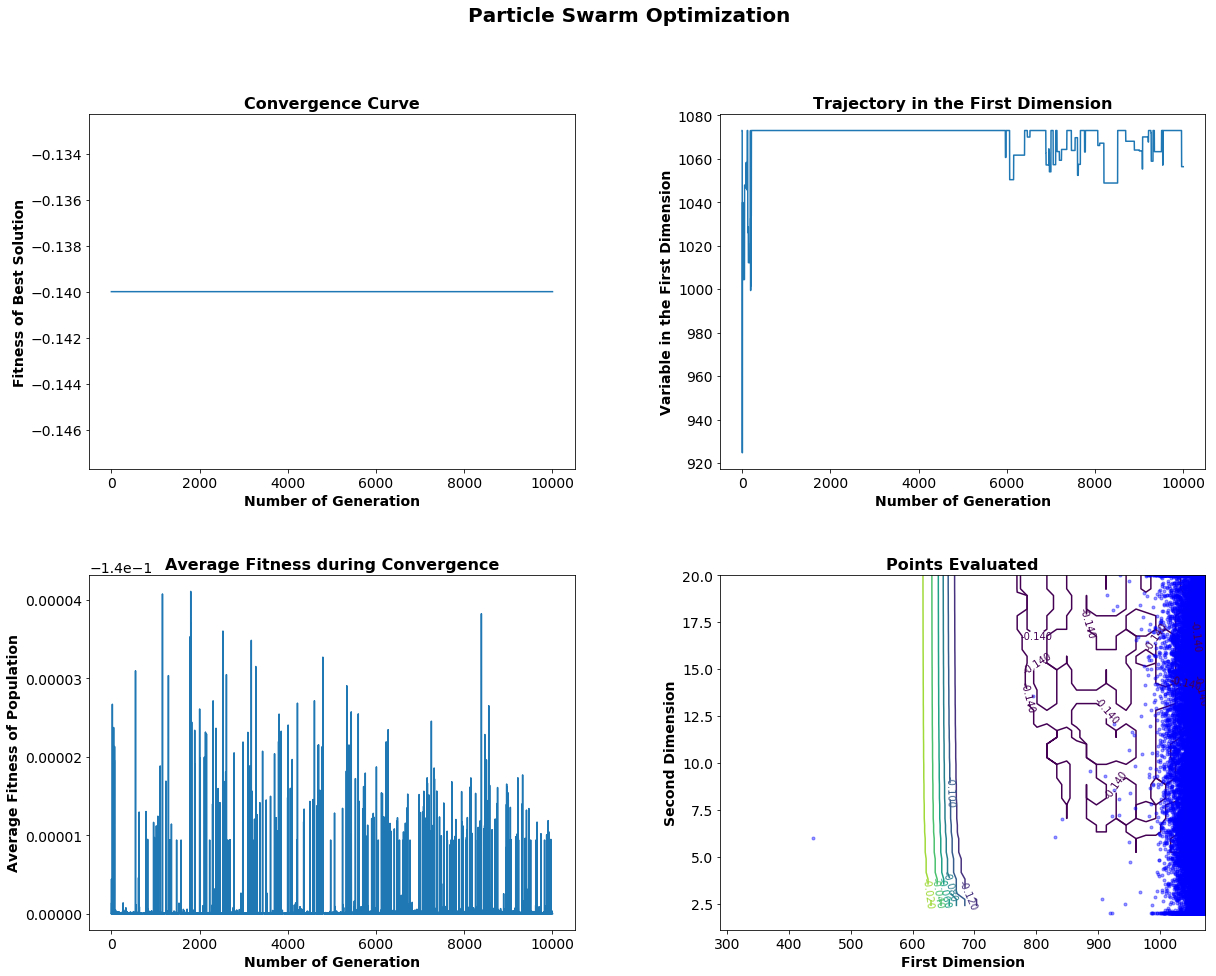

In [32]:
pso.plot_result()

### Solve using Genetic Algorithm ###

In [34]:
#setup solver
ga=GA(reactor,x,lb,ub,pop=5,max_gen=10000)
ga.solve()

Generation # 0 Best Fitness= -0.14 Answer= [992.98322098  19.53841673  36.36877766  21.86361793]
Generation # 1 Best Fitness= -0.14 Answer= [992.98322098  19.53841673  36.36877766  21.86361793]
Generation # 2 Best Fitness= -0.14 Answer= [992.98322098  19.53841673  36.36877766  21.86361793]
Generation # 3 Best Fitness= -0.14 Answer= [992.98322098  19.53841673  36.36877766  21.86361793]
Generation # 4 Best Fitness= -0.14 Answer= [992.98322098  19.53841673  36.36877766  21.86361793]
Generation # 5 Best Fitness= -0.14 Answer= [992.98322098  19.53841673  36.36877766  21.86361793]
Generation # 6 Best Fitness= -0.14 Answer= [992.98322098  19.53841673  36.36877766  21.86361793]
Generation # 7 Best Fitness= -0.14 Answer= [992.98322098  19.53841673  36.36877766  21.86361793]
Generation # 8 Best Fitness= -0.14 Answer= [992.98322098  19.53841673  36.36877766  21.86361793]
Generation # 9 Best Fitness= -0.14 Answer= [992.98322098  19.53841673  36.36877766  21.86361793]
Generation # 10 Best Fitness= 

Generation # 120 Best Fitness= -0.14000000000000004 Answer= [992.98322098   9.06413132  36.36877766  21.86361793]
Generation # 121 Best Fitness= -0.14000000000000004 Answer= [992.98322098   9.06413132  36.36877766  21.86361793]
Generation # 122 Best Fitness= -0.14000000000000004 Answer= [992.98322098   9.06413132  36.36877766  21.86361793]
Generation # 123 Best Fitness= -0.14000000000000004 Answer= [992.98322098   9.06413132  36.36877766  21.86361793]
Generation # 124 Best Fitness= -0.14000000000000004 Answer= [992.98322098   9.06413132  36.36877766  21.86361793]
Generation # 125 Best Fitness= -0.14000000000000004 Answer= [992.98322098   9.06413132  36.36877766  21.86361793]
Generation # 126 Best Fitness= -0.14000000000000004 Answer= [992.98322098   9.06413132  36.36877766  21.86361793]
Generation # 127 Best Fitness= -0.14000000000000004 Answer= [992.98322098   9.06413132  36.36877766  21.86361793]
Generation # 128 Best Fitness= -0.14000000000000004 Answer= [992.98322098   9.06413132  

Generation # 236 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 237 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 238 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 239 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 240 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 241 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 242 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 243 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 244 Best Fitness= -0.14000000000000007 Answ

Generation # 337 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 338 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 339 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 340 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 341 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 342 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 343 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 344 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 345 Best Fitness= -0.14000000000000007 Answ

Generation # 432 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 433 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 434 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 435 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 436 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 437 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 438 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 439 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 440 Best Fitness= -0.14000000000000007 Answ

Generation # 530 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 531 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 532 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 533 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 534 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 535 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 536 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 537 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 538 Best Fitness= -0.14000000000000007 Answ

Generation # 649 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 650 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 651 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 652 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 653 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 654 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 655 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 656 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 657 Best Fitness= -0.14000000000000007 Answ

Generation # 756 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 757 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 758 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 759 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 760 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 761 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 762 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 763 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 764 Best Fitness= -0.14000000000000007 Answ

Generation # 858 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 859 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 860 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 861 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 862 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 863 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 864 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 865 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 866 Best Fitness= -0.14000000000000007 Answ

Generation # 960 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 961 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 962 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 963 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 964 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 965 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 966 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 967 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 968 Best Fitness= -0.14000000000000007 Answ

Generation # 1069 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1070 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1071 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1072 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1073 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1074 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1075 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1076 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1077 Best Fitness= -0.1400000000000

Generation # 1175 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1176 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1177 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1178 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1179 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1180 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1181 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1182 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1183 Best Fitness= -0.1400000000000

Generation # 1273 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1274 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1275 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1276 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1277 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1278 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1279 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1280 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1281 Best Fitness= -0.1400000000000

Generation # 1370 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1371 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1372 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1373 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1374 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1375 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1376 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1377 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1378 Best Fitness= -0.1400000000000

Generation # 1474 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1475 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1476 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1477 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1478 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1479 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1480 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1481 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1482 Best Fitness= -0.1400000000000

Generation # 1579 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1580 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1581 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1582 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1583 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1584 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1585 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1586 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1587 Best Fitness= -0.1400000000000

Generation # 1677 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1678 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1679 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1680 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1681 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1682 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1683 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1684 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1685 Best Fitness= -0.1400000000000

Generation # 1785 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1786 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1787 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1788 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1789 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1790 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1791 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1792 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1793 Best Fitness= -0.1400000000000

Generation # 1890 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1891 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1892 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1893 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1894 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1895 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1896 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1897 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1898 Best Fitness= -0.1400000000000

Generation # 1991 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1992 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1993 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1994 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1995 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1996 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1997 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1998 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 1999 Best Fitness= -0.1400000000000

Generation # 2085 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2086 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2087 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2088 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2089 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2090 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2091 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2092 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2093 Best Fitness= -0.1400000000000

Generation # 2199 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2200 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2201 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2202 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2203 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2204 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2205 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2206 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2207 Best Fitness= -0.1400000000000

Generation # 2313 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2314 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2315 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2316 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2317 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2318 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2319 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2320 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2321 Best Fitness= -0.1400000000000

Generation # 2400 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2401 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2402 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2403 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2404 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2405 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2406 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2407 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2408 Best Fitness= -0.1400000000000

Generation # 2496 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2497 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2498 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2499 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2500 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2501 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2502 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2503 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2504 Best Fitness= -0.1400000000000

Generation # 2585 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2586 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2587 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2588 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2589 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2590 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2591 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2592 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2593 Best Fitness= -0.1400000000000

Generation # 2668 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2669 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2670 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2671 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2672 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2673 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2674 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2675 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2676 Best Fitness= -0.1400000000000

Generation # 2755 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2756 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2757 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2758 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2759 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2760 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2761 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2762 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2763 Best Fitness= -0.1400000000000

Generation # 2839 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2840 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2841 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2842 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2843 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2844 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2845 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2846 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2847 Best Fitness= -0.1400000000000

Generation # 2933 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2934 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2935 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2936 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2937 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2938 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2939 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2940 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 2941 Best Fitness= -0.1400000000000

Generation # 3030 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3031 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3032 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3033 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3034 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3035 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3036 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3037 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3038 Best Fitness= -0.1400000000000

Generation # 3127 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3128 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3129 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3130 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3131 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3132 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3133 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3134 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3135 Best Fitness= -0.1400000000000

Generation # 3219 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3220 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3221 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3222 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3223 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3224 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3225 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3226 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3227 Best Fitness= -0.1400000000000

Generation # 3304 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3305 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3306 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3307 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3308 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3309 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3310 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3311 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3312 Best Fitness= -0.1400000000000

Generation # 3397 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3398 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3399 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3400 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3401 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3402 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3403 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3404 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3405 Best Fitness= -0.1400000000000

Generation # 3483 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3484 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3485 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3486 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3487 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3488 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3489 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3490 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3491 Best Fitness= -0.1400000000000

Generation # 3588 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3589 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3590 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3591 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3592 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3593 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3594 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3595 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3596 Best Fitness= -0.1400000000000

Generation # 3691 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3692 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3693 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3694 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3695 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3696 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3697 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3698 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3699 Best Fitness= -0.1400000000000

Generation # 3776 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3777 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3778 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3779 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3780 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3781 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3782 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3783 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3784 Best Fitness= -0.1400000000000

Generation # 3869 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3870 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3871 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3872 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3873 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3874 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3875 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3876 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3877 Best Fitness= -0.1400000000000

Generation # 3965 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3966 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3967 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3968 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3969 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3970 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3971 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3972 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 3973 Best Fitness= -0.1400000000000

Generation # 4052 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4053 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4054 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4055 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4056 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4057 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4058 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4059 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4060 Best Fitness= -0.1400000000000

Generation # 4154 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4155 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4156 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4157 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4158 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4159 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4160 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4161 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4162 Best Fitness= -0.1400000000000

Generation # 4249 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4250 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4251 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4252 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4253 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4254 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4255 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4256 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4257 Best Fitness= -0.1400000000000

Generation # 4347 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4348 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4349 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4350 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4351 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4352 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4353 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4354 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4355 Best Fitness= -0.1400000000000

Generation # 4451 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4452 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4453 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4454 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4455 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4456 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4457 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4458 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4459 Best Fitness= -0.1400000000000

Generation # 4545 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4546 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4547 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4548 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4549 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4550 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4551 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4552 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4553 Best Fitness= -0.1400000000000

Generation # 4635 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4636 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4637 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4638 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4639 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4640 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4641 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4642 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4643 Best Fitness= -0.1400000000000

Generation # 4724 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4725 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4726 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4727 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4728 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4729 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4730 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4731 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4732 Best Fitness= -0.1400000000000

Generation # 4816 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4817 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4818 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4819 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4820 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4821 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4822 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4823 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4824 Best Fitness= -0.1400000000000

Generation # 4916 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4917 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4918 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4919 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4920 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4921 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4922 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4923 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4924 Best Fitness= -0.1400000000000

Generation # 4998 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 4999 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5000 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5001 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5002 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5003 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5004 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5005 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5006 Best Fitness= -0.1400000000000

Generation # 5090 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5091 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5092 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5093 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5094 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5095 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5096 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5097 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5098 Best Fitness= -0.1400000000000

Generation # 5190 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5191 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5192 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5193 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5194 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5195 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5196 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5197 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5198 Best Fitness= -0.1400000000000

Generation # 5282 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5283 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5284 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5285 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5286 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5287 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5288 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5289 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5290 Best Fitness= -0.1400000000000

Generation # 5372 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5373 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5374 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5375 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5376 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5377 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5378 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5379 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5380 Best Fitness= -0.1400000000000

Generation # 5469 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5470 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5471 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5472 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5473 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5474 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5475 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5476 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5477 Best Fitness= -0.1400000000000

Generation # 5559 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5560 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5561 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5562 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5563 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5564 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5565 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5566 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5567 Best Fitness= -0.1400000000000

Generation # 5663 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5664 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5665 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5666 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5667 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5668 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5669 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5670 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5671 Best Fitness= -0.1400000000000

Generation # 5757 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5758 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5759 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5760 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5761 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5762 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5763 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5764 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5765 Best Fitness= -0.1400000000000

Generation # 5846 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5847 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5848 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5849 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5850 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5851 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5852 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5853 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5854 Best Fitness= -0.1400000000000

Generation # 5943 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5944 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5945 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5946 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5947 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5948 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5949 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5950 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 5951 Best Fitness= -0.1400000000000

Generation # 6030 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6031 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6032 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6033 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6034 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6035 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6036 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6037 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6038 Best Fitness= -0.1400000000000

Generation # 6114 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6115 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6116 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6117 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6118 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6119 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6120 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6121 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6122 Best Fitness= -0.1400000000000

Generation # 6204 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6205 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6206 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6207 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6208 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6209 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6210 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6211 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6212 Best Fitness= -0.1400000000000

Generation # 6294 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6295 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6296 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6297 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6298 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6299 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6300 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6301 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6302 Best Fitness= -0.1400000000000

Generation # 6386 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6387 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6388 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6389 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6390 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6391 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6392 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6393 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6394 Best Fitness= -0.1400000000000

Generation # 6470 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6471 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6472 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6473 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6474 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6475 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6476 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6477 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6478 Best Fitness= -0.1400000000000

Generation # 6569 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6570 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6571 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6572 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6573 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6574 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6575 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6576 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6577 Best Fitness= -0.1400000000000

Generation # 6662 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6663 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6664 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6665 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6666 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6667 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6668 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6669 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6670 Best Fitness= -0.1400000000000

Generation # 6750 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6751 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6752 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6753 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6754 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6755 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6756 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6757 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6758 Best Fitness= -0.1400000000000

Generation # 6843 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6844 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6845 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6846 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6847 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6848 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6849 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6850 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6851 Best Fitness= -0.1400000000000

Generation # 6928 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6929 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6930 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6931 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6932 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6933 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6934 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6935 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 6936 Best Fitness= -0.1400000000000

Generation # 7021 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7022 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7023 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7024 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7025 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7026 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7027 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7028 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7029 Best Fitness= -0.1400000000000

Generation # 7102 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7103 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7104 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7105 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7106 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7107 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7108 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7109 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7110 Best Fitness= -0.1400000000000

Generation # 7185 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7186 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7187 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7188 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7189 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7190 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7191 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7192 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7193 Best Fitness= -0.1400000000000

Generation # 7265 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7266 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7267 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7268 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7269 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7270 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7271 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7272 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7273 Best Fitness= -0.1400000000000

Generation # 7346 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7347 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7348 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7349 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7350 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7351 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7352 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7353 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7354 Best Fitness= -0.1400000000000

Generation # 7425 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7426 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7427 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7428 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7429 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7430 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7431 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7432 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7433 Best Fitness= -0.1400000000000

Generation # 7507 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7508 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7509 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7510 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7511 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7512 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7513 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7514 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7515 Best Fitness= -0.1400000000000

Generation # 7591 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7592 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7593 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7594 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7595 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7596 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7597 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7598 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7599 Best Fitness= -0.1400000000000

Generation # 7677 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7678 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7679 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7680 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7681 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7682 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7683 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7684 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7685 Best Fitness= -0.1400000000000

Generation # 7770 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7771 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7772 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7773 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7774 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7775 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7776 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7777 Best Fitness= -0.14000000000000007 Answer= [1065.48536035    9.06413132   36.36877766   21.86361793]
Generation # 7778 Best Fitness= -0.1400000000000

Generation # 7866 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7867 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7868 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7869 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7870 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7871 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7872 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7873 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7874 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 7953 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7954 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7955 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7956 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7957 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7958 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7959 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7960 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 7961 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8050 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8051 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8052 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8053 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8054 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8055 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8056 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8057 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8058 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8140 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8141 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8142 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8143 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8144 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8145 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8146 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8147 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8148 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8227 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8228 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8229 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8230 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8231 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8232 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8233 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8234 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8235 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8319 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8320 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8321 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8322 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8323 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8324 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8325 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8326 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8327 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8403 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8404 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8405 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8406 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8407 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8408 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8409 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8410 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8411 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8494 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8495 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8496 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8497 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8498 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8499 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8500 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8501 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8502 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8585 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8586 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8587 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8588 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8589 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8590 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8591 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8592 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8593 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8676 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8677 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8678 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8679 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8680 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8681 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8682 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8683 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8684 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8748 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8749 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8750 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8751 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8752 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8753 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8754 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8755 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8756 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8843 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8844 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8845 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8846 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8847 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8848 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8849 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8850 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8851 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 8938 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8939 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8940 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8941 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8942 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8943 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8944 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8945 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 8946 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9028 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9029 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9030 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9031 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9032 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9033 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9034 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9035 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9036 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9124 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9125 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9126 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9127 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9128 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9129 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9130 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9131 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9132 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9213 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9214 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9215 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9216 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9217 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9218 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9219 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9220 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9221 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9307 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9308 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9309 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9310 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9311 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9312 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9313 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9314 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9315 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9394 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9395 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9396 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9397 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9398 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9399 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9400 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9401 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9402 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9487 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9488 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9489 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9490 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9491 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9492 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9493 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9494 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9495 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9575 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9576 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9577 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9578 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9579 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9580 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9581 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9582 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9583 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9670 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9671 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9672 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9673 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9674 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9675 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9676 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9677 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9678 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9764 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9765 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9766 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9767 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9768 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9769 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9770 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9771 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9772 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9857 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9858 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9859 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9860 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9861 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9862 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9863 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9864 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9865 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

Generation # 9951 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9952 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9953 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9954 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9955 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9956 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9957 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9958 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  36.36877766  21.86361793]
Generation # 9959 Best Fitness= -0.1400000000000001 Answer= [858.38841844   9.06413132  

AttributeError: 'FigureManagerBase' object has no attribute 'window'

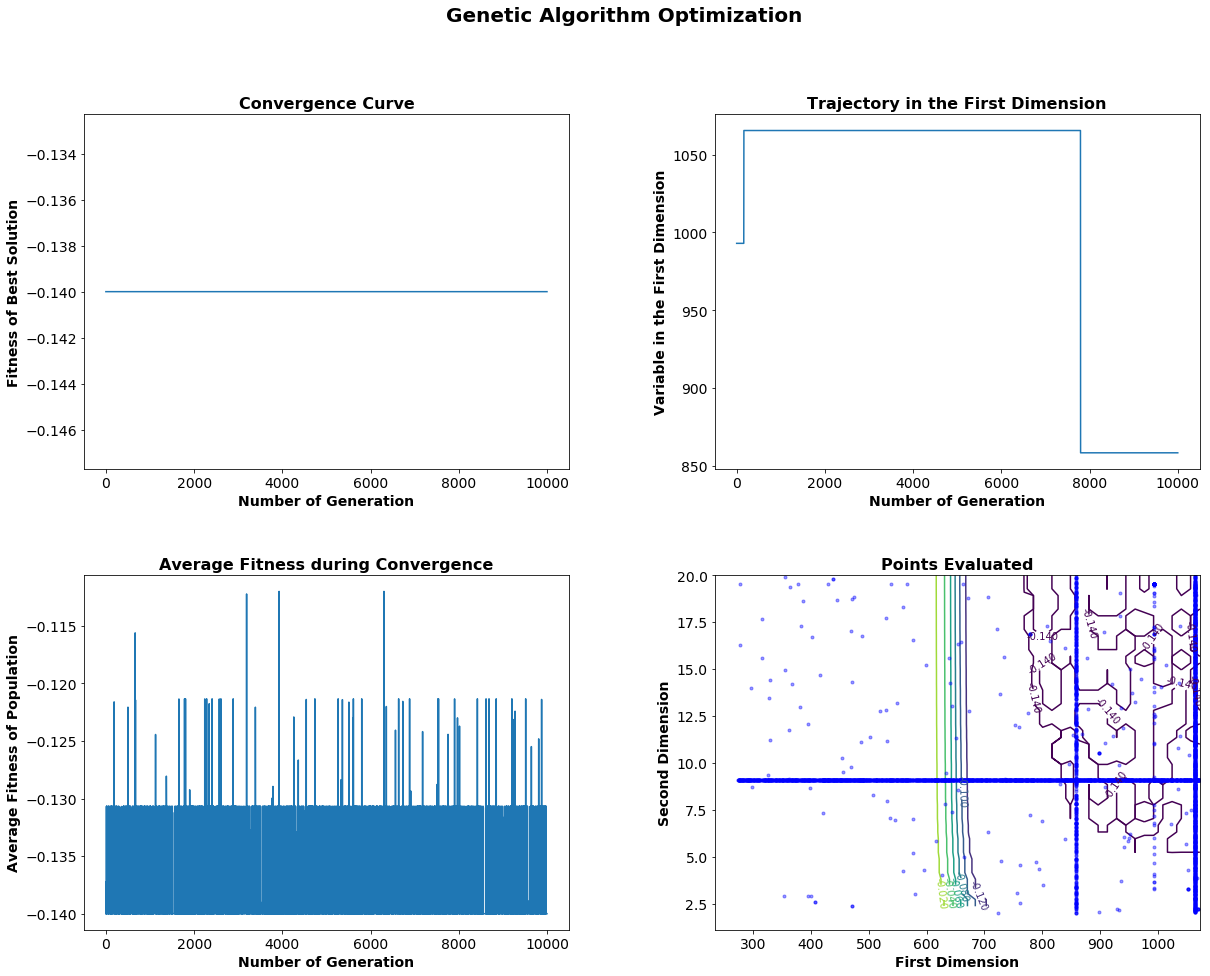

In [35]:
ga.plot_result()

### Solve using GSA ###

In [36]:
#setup solver
gsa=GSA(reactor,x,lb,ub,pop=5,max_gen=10000)
gsa.solve()

Generation # 0 Best Fitness= -0.14 Answer= [980.70446378  12.63749921  92.12336689  19.03921206]
Generation # 1 Best Fitness= -0.14 Answer= [874.25004502   9.34380951  27.0231281  100.        ]
Generation # 2 Best Fitness= -0.14 Answer= [844.89254115   7.06227013  64.27085645  90.7882116 ]
Generation # 3 Best Fitness= -0.14 Answer= [836.52263261   7.13818033  97.59099005  77.32138973]
Generation # 4 Best Fitness= -0.14000000000000004 Answer= [800.5031226    9.15942927  88.27195941  82.1128716 ]
Generation # 5 Best Fitness= -0.14 Answer= [836.07079921  10.92826017  75.30079774  72.94528904]
Generation # 6 Best Fitness= -0.14 Answer= [846.70546284  10.83221115  90.21744942  58.55732218]
Generation # 7 Best Fitness= -0.14000000000000004 Answer= [836.46256297   9.96777515  90.29388966  60.3568516 ]
Generation # 8 Best Fitness= -0.14000000000000004 Answer= [840.3733314    9.50473839  90.11452302  65.83700458]
Generation # 9 Best Fitness= -0.14 Answer= [847.29819219  11.91066139  73.32602474

Generation # 98 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 99 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 100 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 101 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 102 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 103 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 104 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 105 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 106 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 107 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.0

Generation # 204 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 205 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 206 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 207 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 208 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 209 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 210 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 211 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 212 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 213 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1

Generation # 361 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 362 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 363 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 364 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 365 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 366 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 367 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 368 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 369 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 370 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1

Generation # 509 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 510 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 511 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 512 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 513 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 514 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 515 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 516 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 517 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 518 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1

Generation # 657 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 658 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 659 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 660 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 661 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 662 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 663 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 664 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 665 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 666 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1

Generation # 740 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 741 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 742 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 743 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 744 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 745 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 746 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 747 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 748 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 749 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1

Generation # 836 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 837 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 838 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 839 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 840 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 841 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 842 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 843 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 844 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 845 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1

Generation # 917 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 918 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 919 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 920 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 921 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 922 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 923 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 924 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 925 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 926 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1

Generation # 1071 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1072 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1073 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1074 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1075 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1076 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1077 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1078 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1079 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1080 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 1210 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1211 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1212 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1213 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1214 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1215 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1216 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1217 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1218 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1219 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 1370 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1371 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1372 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1373 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1374 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1375 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1376 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1377 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1378 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1379 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 1516 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1517 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1518 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1519 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1520 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1521 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1522 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1523 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1524 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1525 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 1653 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1654 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1655 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1656 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1657 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1658 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1659 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1660 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1661 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1662 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 1807 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1808 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1809 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1810 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1811 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1812 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1813 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1814 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1815 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1816 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 1958 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1959 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1960 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1961 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1962 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1963 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1964 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1965 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1966 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 1967 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 2038 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2039 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2040 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2041 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2042 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2043 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2044 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2045 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2046 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2047 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 2173 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2174 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2175 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2176 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2177 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2178 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2179 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2180 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2181 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2182 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 2295 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2296 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2297 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2298 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2299 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2300 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2301 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2302 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2303 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2304 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 2441 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2442 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2443 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2444 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2445 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2446 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2447 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2448 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2449 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2450 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 2587 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2588 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2589 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2590 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2591 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2592 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2593 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2594 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2595 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2596 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 2726 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2727 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2728 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2729 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2730 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2731 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2732 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2733 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2734 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2735 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 2872 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2873 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2874 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2875 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2876 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2877 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2878 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2879 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2880 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 2881 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 3022 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3023 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3024 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3025 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3026 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3027 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3028 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3029 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3030 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3031 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 3160 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3161 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3162 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3163 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3164 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3165 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3166 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3167 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3168 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3169 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 3305 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3306 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3307 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3308 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3309 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3310 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3311 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3312 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3313 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3314 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 3448 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3449 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3450 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3451 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3452 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3453 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3454 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3455 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3456 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3457 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 3584 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3585 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3586 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3587 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3588 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3589 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3590 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3591 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3592 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3593 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 3726 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3727 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3728 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3729 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3730 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3731 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3732 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3733 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3734 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3735 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 3864 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3865 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3866 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3867 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3868 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3869 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3870 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3871 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3872 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3873 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 3991 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3992 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3993 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3994 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3995 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3996 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3997 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3998 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 3999 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4000 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 4124 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4125 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4126 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4127 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4128 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4129 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4130 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4131 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4132 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4133 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 4251 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4252 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4253 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4254 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4255 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4256 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4257 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4258 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4259 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4260 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 4394 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4395 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4396 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4397 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4398 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4399 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4400 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4401 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4402 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4403 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 4528 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4529 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4530 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4531 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4532 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4533 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4534 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4535 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4536 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4537 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 4681 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4682 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4683 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4684 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4685 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4686 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4687 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4688 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4689 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4690 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 4810 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4811 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4812 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4813 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4814 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4815 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4816 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4817 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4818 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4819 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 4945 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4946 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4947 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4948 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4949 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4950 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4951 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4952 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4953 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 4954 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 5080 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5081 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5082 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5083 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5084 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5085 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5086 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5087 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5088 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5089 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 5223 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5224 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5225 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5226 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5227 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5228 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5229 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5230 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5231 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5232 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 5363 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5364 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5365 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5366 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5367 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5368 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5369 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5370 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5371 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5372 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 5503 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5504 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5505 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5506 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5507 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5508 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5509 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5510 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5511 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5512 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 5629 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5630 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5631 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5632 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5633 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5634 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5635 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5636 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5637 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5638 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 5778 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5779 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5780 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5781 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5782 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5783 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5784 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5785 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5786 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5787 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 5902 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5903 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5904 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5905 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5906 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5907 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5908 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5909 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5910 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 5911 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 6037 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6038 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6039 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6040 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6041 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6042 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6043 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6044 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6045 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6046 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 6160 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6161 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6162 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6163 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6164 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6165 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6166 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6167 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6168 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6169 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 6305 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6306 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6307 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6308 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6309 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6310 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6311 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6312 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6313 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6314 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 6425 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6426 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6427 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6428 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6429 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6430 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6431 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6432 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6433 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6434 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 6553 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6554 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6555 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6556 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6557 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6558 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6559 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6560 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6561 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6562 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 6654 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6655 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6656 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6657 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6658 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6659 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6660 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6661 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6662 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6663 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 6755 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6756 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6757 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6758 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6759 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6760 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6761 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6762 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6763 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6764 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 6852 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6853 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6854 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6855 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6856 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6857 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6858 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6859 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6860 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6861 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 6954 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6955 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6956 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6957 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6958 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6959 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6960 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6961 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6962 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 6963 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 7053 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7054 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7055 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7056 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7057 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7058 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7059 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7060 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7061 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7062 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 7142 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7143 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7144 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7145 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7146 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7147 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7148 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7149 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7150 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7151 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 7226 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7227 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7228 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7229 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7230 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7231 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7232 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7233 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7234 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7235 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 7329 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7330 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7331 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7332 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7333 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7334 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7335 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7336 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7337 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7338 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 7430 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7431 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7432 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7433 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7434 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7435 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7436 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7437 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7438 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7439 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 7523 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7524 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7525 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7526 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7527 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7528 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7529 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7530 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7531 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7532 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 7625 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7626 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7627 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7628 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7629 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7630 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7631 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7632 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7633 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7634 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 7725 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7726 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7727 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7728 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7729 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7730 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7731 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7732 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7733 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7734 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 7823 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7824 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7825 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7826 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7827 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7828 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7829 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7830 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7831 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7832 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 7920 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7921 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7922 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7923 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7924 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7925 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7926 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7927 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7928 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 7929 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8018 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8019 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8020 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8021 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8022 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8023 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8024 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8025 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8026 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8027 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8103 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8104 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8105 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8106 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8107 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8108 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8109 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8110 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8111 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8112 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8192 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8193 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8194 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8195 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8196 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8197 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8198 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8199 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8200 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8201 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8277 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8278 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8279 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8280 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8281 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8282 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8283 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8284 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8285 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8286 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8363 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8364 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8365 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8366 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8367 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8368 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8369 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8370 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8371 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8372 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8448 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8449 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8450 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8451 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8452 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8453 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8454 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8455 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8456 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8457 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8531 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8532 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8533 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8534 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8535 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8536 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8537 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8538 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8539 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8540 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8616 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8617 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8618 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8619 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8620 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8621 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8622 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8623 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8624 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8625 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8700 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8701 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8702 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8703 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8704 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8705 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8706 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8707 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8708 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8709 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8784 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8785 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8786 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8787 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8788 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8789 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8790 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8791 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8792 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8793 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8871 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8872 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8873 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8874 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8875 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8876 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8877 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8878 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8879 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8880 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 8963 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8964 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8965 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8966 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8967 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8968 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8969 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8970 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8971 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 8972 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9056 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9057 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9058 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9059 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9060 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9061 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9062 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9063 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9064 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9065 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9147 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9148 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9149 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9150 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9151 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9152 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9153 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9154 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9155 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9156 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9237 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9238 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9239 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9240 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9241 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9242 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9243 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9244 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9245 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9246 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9326 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9327 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9328 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9329 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9330 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9331 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9332 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9333 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9334 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9335 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9416 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9417 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9418 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9419 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9420 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9421 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9422 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9423 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9424 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9425 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9503 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9504 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9505 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9506 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9507 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9508 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9509 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9510 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9511 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9512 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9593 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9594 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9595 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9596 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9597 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9598 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9599 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9600 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9601 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9602 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9680 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9681 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9682 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9683 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9684 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9685 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9686 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9687 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9688 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9689 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9766 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9767 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9768 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9769 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9770 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9771 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9772 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9773 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9774 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9775 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9846 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9847 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9848 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9849 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9850 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9851 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9852 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9853 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9854 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9855 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

Generation # 9928 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9929 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9930 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9931 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9932 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9933 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9934 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9935 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9936 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2.000e+00 1.000e+02 5.000e-01]
Generation # 9937 Best Fitness= -0.13999976520198873 Answer= [1.073e+03 2

AttributeError: 'FigureManagerBase' object has no attribute 'window'

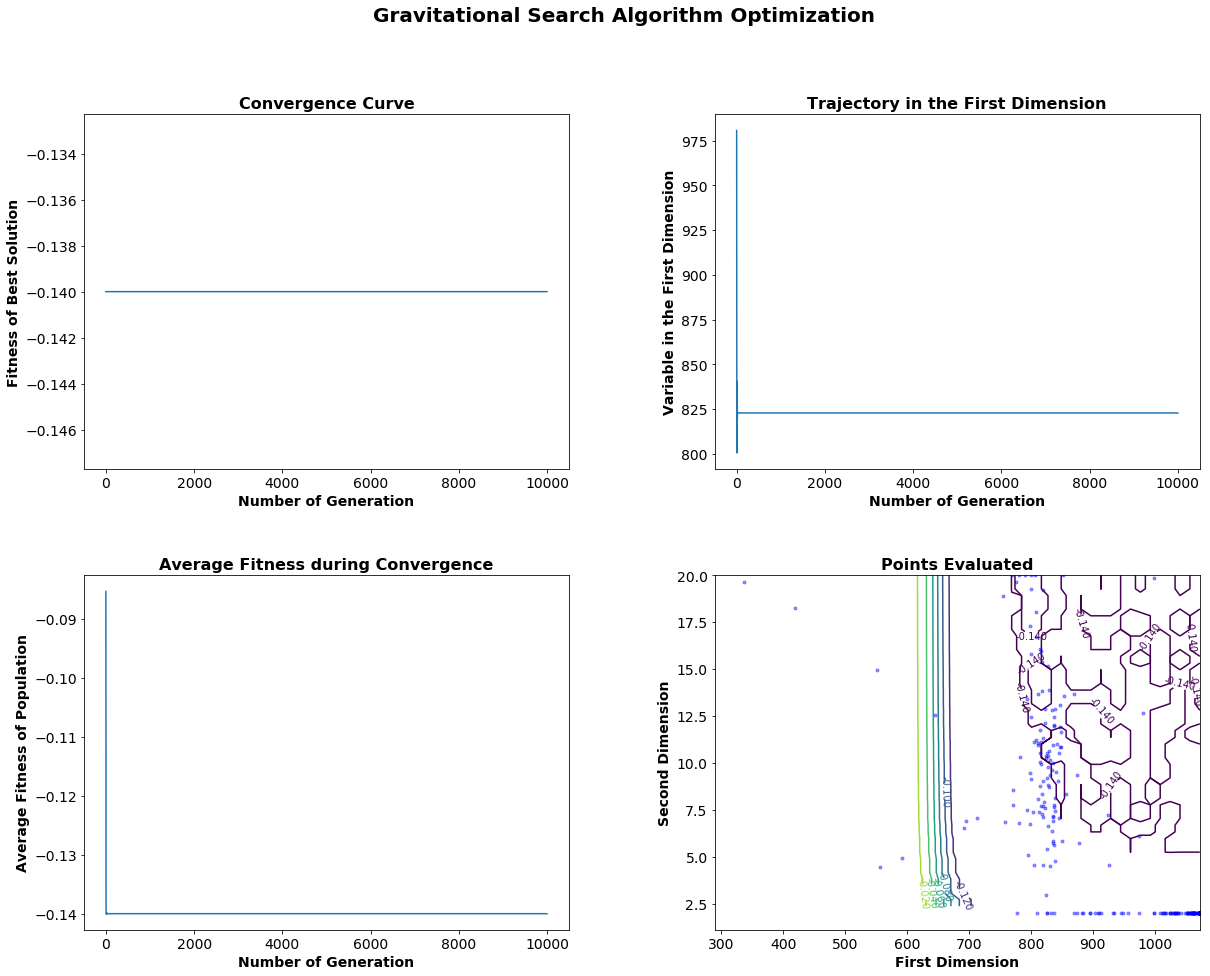

In [37]:
gsa.plot_result()